In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from umap import UMAP
from scipy.stats import norm
from sklearn.datasets import make_multilabel_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
file_path_features = '../Data/final_features.csv'
file_path_echonest = '../Data/final_echonest_features.csv'

## EDA (in other Sheet)

# Echonest

In [3]:
# Read the data file with the specified column headers
echo_df = pd.read_csv(file_path_echonest)

echo_df.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_32816/1870594795.py:2: DtypeWarning: Columns (42,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  echo_df = pd.read_csv(file_path_echonest)


album_comments   album_date_created album_date_released album_engineer  \
0               0  2008-11-26 01:44:45          2009-01-05            NaN   
1               0  2008-11-26 01:44:45          2009-01-05            NaN   
2               0  2008-11-26 01:44:45          2009-01-05            NaN   
3               0  2008-11-26 01:45:08          2008-02-06            NaN   
4               0  2008-11-26 01:44:45          2009-01-05            NaN   

   album_favorites  album_id album_information  album_listens album_producer  \
0                4         1           <p></p>           6073            NaN   
1                4         1           <p></p>           6073            NaN   
2                4         1           <p></p>           6073            NaN   
3                4         6               NaN          47632            NaN   
4                4         1           <p></p>           6073            NaN   

  album_tags  ... echonest_temporal_features_214  \
0         []  ...                      -1.992303   
1         []  ...                      -1.582331   
2         []  ...                      -2.288358   
3         []  ...                      -3.662988   
4         []  ...                      -1.452696   

   echonest_temporal_features_215 echonest_temporal_features_216  \
0                        6.805694                       0.233070   
1                        8.889308                       0.258464   
2                       11.527109                       0.256821   
3                       21.508228                       0.283352   
4                        2.356398                       0.234686   

  echonest_temporal_features_217 echonest_temporal_features_218  \
0                       0.192880                       0.027455   
1                       0.220905                       0.081368   
2                       0.237820                       0.060122   
3                       0.267070                       0.125704   
4                       0.199550                       0.149332   

  echonest_temporal_features_219 echonest_temporal_features_220  \
0                        0.06408                        3.67696   
1                        0.06413                        6.08277   
2                        0.06014                        5.92649   
3                        0.08082                        8.41401   
4                        0.06440                       11.26707   

   echonest_temporal_features_221 echonest_temporal_features_222  \
0                         3.61288                      13.316690   
1                         6.01864                      16.673548   
2                         5.86635                      16.013849   
3                         8.33319                      21.317064   
4                        11.20267                      26.454180   

   echonest_temporal_features_223  
0                      262.929749  
1                      325.581085  
2                      356.755737  
3                      483.403809  
4                      751.147705  

[5 rows x 819 columns]

In [4]:
echo_df.shape

(13129, 819)

In [5]:
numeric_cols = echo_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize only numeric columns
df_std = (echo_df[numeric_cols] - echo_df[numeric_cols].mean()) / echo_df[numeric_cols].std()

# Concatenate the standardized numeric columns with non-numeric columns
df_std = pd.concat([echo_df.drop(columns=numeric_cols), df_std], axis=1)

# Display the head of the resulting DataFrame
df_std.head()

album_date_created album_date_released album_engineer album_information  \
0  2008-11-26 01:44:45          2009-01-05            NaN           <p></p>   
1  2008-11-26 01:44:45          2009-01-05            NaN           <p></p>   
2  2008-11-26 01:44:45          2009-01-05            NaN           <p></p>   
3  2008-11-26 01:45:08          2008-02-06            NaN               NaN   
4  2008-11-26 01:44:45          2009-01-05            NaN           <p></p>   

  album_producer album_tags           album_title album_type  \
0            NaN         []  AWOL - A Way Of Life      Album   
1            NaN         []  AWOL - A Way Of Life      Album   
2            NaN         []  AWOL - A Way Of Life      Album   
3            NaN         []     Constant Hitmaker      Album   
4            NaN         []  AWOL - A Way Of Life      Album   

  artist_active_year_begin artist_active_year_end  ...  \
0               2006-01-01                    NaN  ...   
1               2006-01-01                    NaN  ...   
2               2006-01-01                    NaN  ...   
3                      NaN                    NaN  ...   
4               2006-01-01                    NaN  ...   

  echonest_temporal_features_214 echonest_temporal_features_215  \
0                      -0.015394                      -0.196491   
1                       0.224566                      -0.092586   
2                      -0.188678                       0.038954   
3                      -0.993261                       0.536688   
4                       0.300443                      -0.418366   

  echonest_temporal_features_216 echonest_temporal_features_217  \
0                      -0.541608                      -0.746446   
1                      -0.360435                      -0.411743   
2                      -0.372152                      -0.209727   
3                      -0.182870                       0.139607   
4                      -0.530074                      -0.666786   

  echonest_temporal_features_218 echonest_temporal_features_219  \
0                      -0.039155                      -0.406784   
1                      -0.023681                      -0.402210   
2                      -0.029779                      -0.767258   
3                      -0.010956                       1.124769   
4                      -0.004174                      -0.377507   

  echonest_temporal_features_220 echonest_temporal_features_221  \
0                      -0.101957                      -0.101071   
1                       0.382355                       0.383277   
2                       0.350895                       0.352617   
3                       0.851655                       0.849262   
4                       1.426003                       1.426971   

  echonest_temporal_features_222 echonest_temporal_features_223  
0                       0.886169                       0.549670  
1                       1.407026                       0.827399  
2                       1.304665                       0.965594  
3                       2.127522                       1.527014  
4                       2.924606                       2.713902  

[5 rows x 819 columns]

### Drop numerical Columns

In [6]:
columns_to_drop = ['album_comments', 'album_date_created', 'album_date_released',
                    'album_engineer', 'album_favorites', 'album_id',
                    'album_information', 'album_listens', 'album_producer',
                    'album_tags', 'album_title', 'album_tracks', 'album_type',
                    'artist_active_year_begin', 'artist_active_year_end',
                    'artist_associated_labels', 'artist_bio', 'artist_comments',
                    'artist_date_created', 'artist_favorites', 'artist_id',
                    'artist_latitude', 'artist_location', 'artist_longitude',
                    'artist_members', 'artist_name', 'artist_related_projects',
                    'artist_tags', 'artist_website', 'artist_wikipedia_page',
                    'set_split', 'set_subset', 'track_bit_rate', 'track_comments',
                    'track_composer', 'track_date_created', 'track_date_recorded',
                    'track_duration', 'track_favorites', 'track_genre_top',
                    'track_genres', 'track_genres_all', 'track_information',
                    'track_interest', 'track_language_code', 'track_license',
                    'track_listens', 'track_lyricist', 'track_number',
                    'track_publisher', 'track_tags', 'track_title']

df_std.drop(columns=columns_to_drop, inplace=True)

In [7]:
columns_to_drop = ['echonest_metadata_album_date',
                   'echonest_metadata_album_name',
                   'echonest_metadata_artist_latitude',
                   'echonest_metadata_artist_location',
                   'echonest_metadata_artist_longitude',
                   'echonest_metadata_artist_name',
                   'echonest_metadata_release',
                   'echonest_ranks_artist_discovery_rank',
                   'echonest_ranks_artist_familiarity_rank',
                   'echonest_ranks_artist_hotttnesss_rank',
                   'echonest_metadata_artist_location',
                   'echonest_metadata_artist_name',
                   'echonest_metadata_release'
                  ]

In [8]:
df_std.drop(columns=columns_to_drop, inplace=True)

In [9]:
df_std.head()

chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  chroma_cens_kurtosis_03  \
0                 4.419124                 3.603920                 0.045437   
1                 1.097430                 0.483653                 0.106345   
2                 0.242853                -0.101476                -0.290230   
3                 2.235662                -0.250543                 1.281298   
4                 0.488217                 0.423344                 0.253906   

   chroma_cens_kurtosis_04  chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
0                 1.117494                 0.714768                 0.196248   
1                 1.941079                 0.802157                -0.023927   
2                 0.542347                 0.946592                 0.362155   
3                -0.257556                 0.656129                 0.417972   
4                 1.059693                 0.435244                -0.018902   

   chroma_cens_kurtosis_07  chroma_cens_kurtosis_08  chroma_cens_kurtosis_09  \
0                 1.001587                 0.620118                 0.380048   
1                 0.919823                 0.217405                 0.020102   
2                -0.711991                -0.269906                 0.285052   
3                 1.207592                 0.352795                 0.216077   
4                 0.800365                -0.084947                 0.407854   

   chroma_cens_kurtosis_10  ...  echonest_temporal_features_214  \
0                 0.509364  ...                       -0.015394   
1                 0.213077  ...                        0.224566   
2                 0.385159  ...                       -0.188678   
3                 0.772459  ...                       -0.993261   
4                 0.549282  ...                        0.300443   

   echonest_temporal_features_215  echonest_temporal_features_216  \
0                       -0.196491                       -0.541608   
1                       -0.092586                       -0.360435   
2                        0.038954                       -0.372152   
3                        0.536688                       -0.182870   
4                       -0.418366                       -0.530074   

   echonest_temporal_features_217  echonest_temporal_features_218  \
0                       -0.746446                       -0.039155   
1                       -0.411743                       -0.023681   
2                       -0.209727                       -0.029779   
3                        0.139607                       -0.010956   
4                       -0.666786                       -0.004174   

   echonest_temporal_features_219  echonest_temporal_features_220  \
0                       -0.406784                       -0.101957   
1                       -0.402210                        0.382355   
2                       -0.767258                        0.350895   
3                        1.124769                        0.851655   
4                       -0.377507                        1.426003   

   echonest_temporal_features_221  echonest_temporal_features_222  \
0                       -0.101071                        0.886169   
1                        0.383277                        1.407026   
2                        0.352617                        1.304665   
3                        0.849262                        2.127522   
4                        1.426971                        2.924606   

   echonest_temporal_features_223  
0                        0.549670  
1                        0.827399  
2                        0.965594  
3                        1.527014  
4                        2.713902  

[5 rows x 757 columns]

In [10]:
print(df_std.select_dtypes(exclude=['float64', 'int64']).columns)

Index([], dtype='object')


### Drop Columns with missing Values

In [11]:
df_std.shape

(13129, 757)

In [12]:
columns_to_drop = ['chroma_stft_max_10',
                   'echonest_ranks_song_currency_rank',
                   'echonest_ranks_song_hotttnesss_rank'
                  ]

In [13]:
df_std.drop(columns=columns_to_drop, inplace=True)

In [14]:
X = df_std.copy()

# OPTIONAL: Select most important features

In [15]:
# For example: adjust this code to drop all the features with _02, _03, ... _09, _10
# Then we have only 60 cols and maybe can PCA down to 2 for isualization?
# Print the names of columns containing "-01"
# columns_with_01 = [col_name for col_name in df.columns if "_01" in col_name]
# print(columns_with_01)

## PCA on Echonest (60% Variance)

### Try: PCA 2 cmponents only Plot KNN clusters

### Try: PCA 100 components then KNN clusters for further agglomeritive clustering

## UMAP --> Does not work

In [16]:
# pip install numpy==1.26.4

## Kernel PCA (10 Components, adjust if needed)

# X-> Fewer Columns ->PCA

In [17]:
def count_unique_groups_and_list(column_names):
    # Extract prefixes by removing the last part after the last underscore
    prefixes = set([name.rsplit('_', 1)[0] for name in column_names])
    # Return both count and list of unique prefixes
    return len(prefixes), sorted(list(prefixes))

unique_prefix_list=count_unique_groups_and_list(X.columns)[1]
unique_prefix_list

['chroma_cens_kurtosis',
 'chroma_cens_max',
 'chroma_cens_mean',
 'chroma_cens_median',
 'chroma_cens_min',
 'chroma_cens_skew',
 'chroma_cens_std',
 'chroma_cqt_kurtosis',
 'chroma_cqt_max',
 'chroma_cqt_mean',
 'chroma_cqt_median',
 'chroma_cqt_min',
 'chroma_cqt_skew',
 'chroma_cqt_std',
 'chroma_stft_kurtosis',
 'chroma_stft_max',
 'chroma_stft_mean',
 'chroma_stft_median',
 'chroma_stft_min',
 'chroma_stft_skew',
 'chroma_stft_std',
 'echonest_audio_features',
 'echonest_social_features_artist',
 'echonest_social_features_song',
 'echonest_temporal_features',
 'mfcc_kurtosis',
 'mfcc_max',
 'mfcc_mean',
 'mfcc_median',
 'mfcc_min',
 'mfcc_skew',
 'mfcc_std',
 'rmse_kurtosis',
 'rmse_max',
 'rmse_mean',
 'rmse_median',
 'rmse_min',
 'rmse_skew',
 'rmse_std',
 'spectral_bandwidth_kurtosis',
 'spectral_bandwidth_max',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_median',
 'spectral_bandwidth_min',
 'spectral_bandwidth_skew',
 'spectral_bandwidth_std',
 'spectral_centroid_kurtosi

In [18]:
import pandas as pd
import numpy as np


# Function to reduce the DataFrame to the average of each group of columns
def reduce_to_average(df, column_names):
    # Initialize an empty DataFrame to hold the averages
    df_reduced = pd.DataFrame()
    
    for prefix in column_names:
        # Identify columns that start with the current prefix
        matching_columns = [col for col in df.columns if col.startswith(prefix)]
        
        # If matching columns found, calculate their average and add to the reduced DataFrame
        if matching_columns:
            df_reduced[prefix + "_avg"] = df[matching_columns].mean(axis=1)
            
    return df_reduced

# Reduce the sample DataFrame to the average of each group of columns
df_reduced = reduce_to_average(X, unique_prefix_list)

# Display the first few rows of the reduced DataFrame to verify the transformation
df_reduced.head()


chroma_cens_kurtosis_avg  chroma_cens_max_avg  chroma_cens_mean_avg  \
0                  1.123671            -0.429898              0.139566   
1                  0.548879            -0.530209              0.260967   
2                  0.157269            -0.653936              0.233206   
3                  0.702865            -0.651994              0.319400   
4                  0.383941             0.058322              0.131255   

   chroma_cens_median_avg  chroma_cens_min_avg  chroma_cens_skew_avg  \
0                0.286570            -0.282908             -1.285688   
1                0.354622            -0.282908             -0.412950   
2                0.251127            -0.282908             -0.621488   
3                0.372256            -0.191849             -0.577658   
4                0.248196            -0.282908             -1.049590   

   chroma_cens_std_avg  chroma_cqt_kurtosis_avg  chroma_cqt_max_avg  \
0            -1.107726                 0.194379            0.028226   
1            -1.014874                -0.062230            0.028226   
2            -0.680792                -0.152682            0.028226   
3            -1.167346                 0.120597            0.028226   
4            -0.435672                -0.137186            0.028226   

   chroma_cqt_mean_avg  ...  tonnetz_min_avg  tonnetz_skew_avg  \
0             0.345926  ...         0.872822         -0.065788   
1             0.614212  ...         0.957311          0.298539   
2             0.482458  ...        -0.202619         -0.141922   
3             0.953685  ...         0.179084          0.181784   
4             0.477419  ...         0.177154          0.039380   

   tonnetz_std_avg  zcr_kurtosis_avg  zcr_max_avg  zcr_mean_avg  \
0        -1.280437         -0.381707     0.393525      1.208630   
1        -1.027615         -0.439859     0.432782      1.168189   
2        -1.079687         -0.360906    -0.091581     -0.042571   
3        -0.615957         -0.071041     0.351464      0.896365   
4        -0.820598         -0.402076     0.163590      0.390543   

   zcr_median_avg  zcr_min_avg  zcr_skew_avg  zcr_std_avg  
0        1.035727    -0.594278     -0.378696     0.931998  
1        0.741989    -0.594278     -0.526637     1.267267  
2       -0.158806    -0.594278     -0.337688     0.226435  
3        1.055309    -0.594278      0.197157     0.053733  
4        0.213262    -0.594278     -0.491200     0.641680  

[5 rows x 81 columns]

In [19]:
X[[
    "echonest_audio_features_acousticness", "echonest_audio_features_danceability", "echonest_audio_features_energy",
    "echonest_audio_features_instrumentalness", "echonest_audio_features_liveness", "echonest_audio_features_speechiness",
    "echonest_audio_features_tempo", "echonest_audio_features_valence", "echonest_social_features_artist_discovery",
    "echonest_social_features_artist_familiarity", "echonest_social_features_artist_hotttnesss", "echonest_social_features_song_currency",
    "echonest_social_features_song_hotttnesss"
]]

echonest_audio_features_acousticness  \
0                                 -0.281489   
1                                 -0.391641   
2                                 -1.253838   
3                                  1.112749   
4                                 -0.188863   
...                                     ...   
13124                             -1.347590   
13125                             -1.259230   
13126                             -1.367052   
13127                             -0.513687   
13128                              1.222038   

       echonest_audio_features_danceability  echonest_audio_features_energy  \
0                                  0.991877                        0.348718   
1                                  0.217476                        1.006822   
2                                  1.358286                        0.589661   
3                                  0.898711                        1.391876   
4                                  0.136460                        0.082339   
...                                     ...                             ...   
13124                              1.593882                        0.653745   
13125                              1.871104                       -0.003667   
13126                              0.643687                        1.286177   
13127                              0.458252                        0.038883   
13128                              0.063364                       -1.751107   

       echonest_audio_features_instrumentalness  \
0                                     -1.742821   
1                                     -1.767105   
2                                     -1.770298   
3                                      0.898904   
4                                     -1.718432   
...                                         ...   
13124                                  0.588157   
13125                                  0.621462   
13126                                  0.570201   
13127                                 -0.519239   
13128                                  0.844259   

       echonest_audio_features_liveness  echonest_audio_features_speechiness  \
0                             -0.064265                             0.437732   
1                             -0.518338                             2.639704   
2                              1.172660                             0.185042   
3                             -0.457637                            -0.481793   
4                             -0.577264                             3.103389   
...                                 ...                                  ...   
13124                          3.371778                            -0.121012   
13125                          2.278674                            -0.183240   
13126                          2.816183                            -0.346898   
13127                         -0.707848                            -0.478858   
13128                         -0.581069                            -0.247380   

       echonest_audio_features_tempo  echonest_audio_features_valence  \
0                           1.223526                         0.495964   
1                           0.110722                        -0.617765   
2                          -0.651720                         0.658992   
3                          -0.328945                         1.897737   
4                          -0.251036                         1.645887   
...                              ...                              ...   
13124                       0.521259                         1.632803   
13125                      -0.602741                         0.134351   
13126                       0.197513                         0.206162   
13127                       0.540593                         0.469204   
13128                      -0.088963                        -0.851755   

       echonest_social_features_artist_dis

In [20]:
# Columns to be dropped from 'df_reduced_sample'
columns_to_drop = ['echonest_audio_features_avg', 'echonest_social_features_artist_avg',
                   'echonest_social_features_song_avg', 'echonest_temporal_features_avg']

# Add the specified 'echonest_' columns from 'X' to 'df_reduced_sample'
df_reduced = pd.concat([df_reduced, X[[
    "echonest_audio_features_acousticness", "echonest_audio_features_danceability", "echonest_audio_features_energy",
    "echonest_audio_features_instrumentalness", "echonest_audio_features_liveness", "echonest_audio_features_speechiness",
    "echonest_audio_features_tempo", "echonest_audio_features_valence", "echonest_social_features_artist_discovery",
    "echonest_social_features_artist_familiarity", "echonest_social_features_artist_hotttnesss", "echonest_social_features_song_currency",
    "echonest_social_features_song_hotttnesss"]
]], axis=1)


# Drop the specified columns
df_reduced.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [21]:
len(df_reduced.columns)

90

In [22]:
df_reduced.head()

chroma_cens_kurtosis_avg  chroma_cens_max_avg  chroma_cens_mean_avg  \
0                  1.123671            -0.429898              0.139566   
1                  0.548879            -0.530209              0.260967   
2                  0.157269            -0.653936              0.233206   
3                  0.702865            -0.651994              0.319400   
4                  0.383941             0.058322              0.131255   

   chroma_cens_median_avg  chroma_cens_min_avg  chroma_cens_skew_avg  \
0                0.286570            -0.282908             -1.285688   
1                0.354622            -0.282908             -0.412950   
2                0.251127            -0.282908             -0.621488   
3                0.372256            -0.191849             -0.577658   
4                0.248196            -0.282908             -1.049590   

   chroma_cens_std_avg  chroma_cqt_kurtosis_avg  chroma_cqt_max_avg  \
0            -1.107726                 0.194379            0.028226   
1            -1.014874                -0.062230            0.028226   
2            -0.680792                -0.152682            0.028226   
3            -1.167346                 0.120597            0.028226   
4            -0.435672                -0.137186            0.028226   

   chroma_cqt_mean_avg  ...  echonest_audio_features_instrumentalness  \
0             0.345926  ...                                 -1.742821   
1             0.614212  ...                                 -1.767105   
2             0.482458  ...                                 -1.770298   
3             0.953685  ...                                  0.898904   
4             0.477419  ...                                 -1.718432   

   echonest_audio_features_liveness  echonest_audio_features_speechiness  \
0                         -0.064265                             0.437732   
1                         -0.518338                             2.639704   
2                          1.172660                             0.185042   
3                         -0.457637                            -0.481793   
4                         -0.577264                             3.103389   

   echonest_audio_features_tempo  echonest_audio_features_valence  \
0                       1.223526                         0.495964   
1                       0.110722                        -0.617765   
2                      -0.651720                         0.658992   
3                      -0.328945                         1.897737   
4                      -0.251036                         1.645887   

   echonest_social_features_artist_discovery  \
0                                   0.584490   
1                                   0.584490   
2                                   0.584490   
3                                   2.053264   
4                                   0.584490   

   echonest_social_features_artist_familiarity  \
0                                     0.782934   
1                                     0.782934   
2                                     0.782934   
3                                     2.556316   
4                                     0.782934   

   echonest_social_features_artist_hotttnesss  \
0                                    0.447188   
1                                    0.447188   
2                                    0.447188   
3                                    3.388521   
4                                    0.447188   

   echonest_social_features_song_currency  \
0                               -0.158604   
1                               -0.158604   
2                               -0.158604   
3                                3.340652   
4                               -0.158604   

   echonest_social_features_song_hotttnesss  
0                                 -0.537520  
1                                 -0.537520  
2                                 -0.537520  
3                                  5.183691  
4

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Step 1: Standardize the dataset
scaler = StandardScaler()
df_reduced_standardized = scaler.fit_transform(df_reduced)

# Step 2: Perform PCA
pca = PCA()
pca.fit(df_reduced_standardized)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()


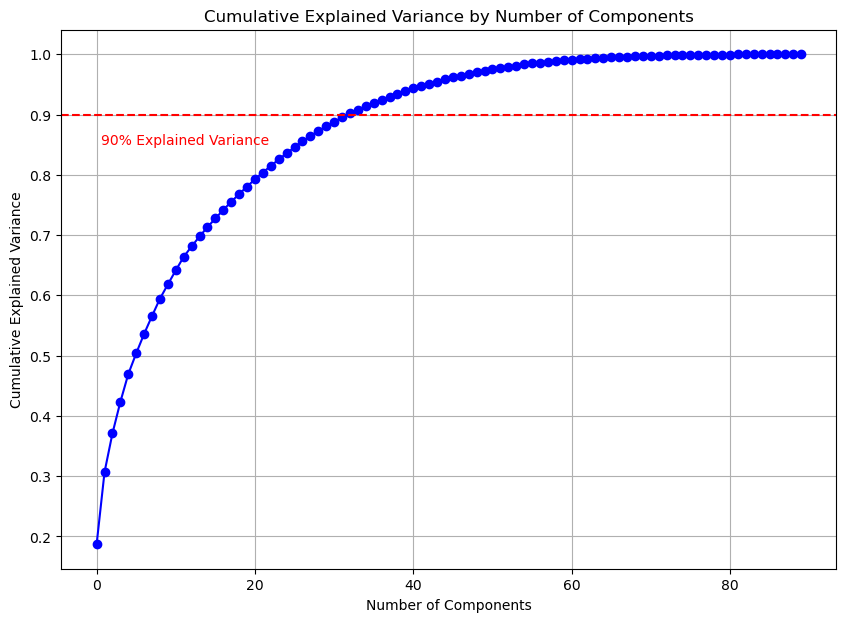

In [24]:
import matplotlib.pyplot as plt

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Adding a horizontal line at 0.9 to indicate the 90% threshold
plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(0.5, 0.85, '90% Explained Variance', color = 'red')

plt.show()


# TRY T-SNE

In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_reduced_standardized_tsne = scaler.fit_transform(df_reduced)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=123)
tsne_data = tsne.fit_transform(df_reduced_standardized_tsne)


# Try U-MAP

In [26]:
# NOT WORKING

# Final PCA

In [27]:
#pca for df_reduced
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
df_reduced_standardized = scaler.fit_transform(df_reduced)

# Step 2: Perform PCA
pca = PCA()
pca.fit(df_reduced_standardized)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()


# Visualize Loadings

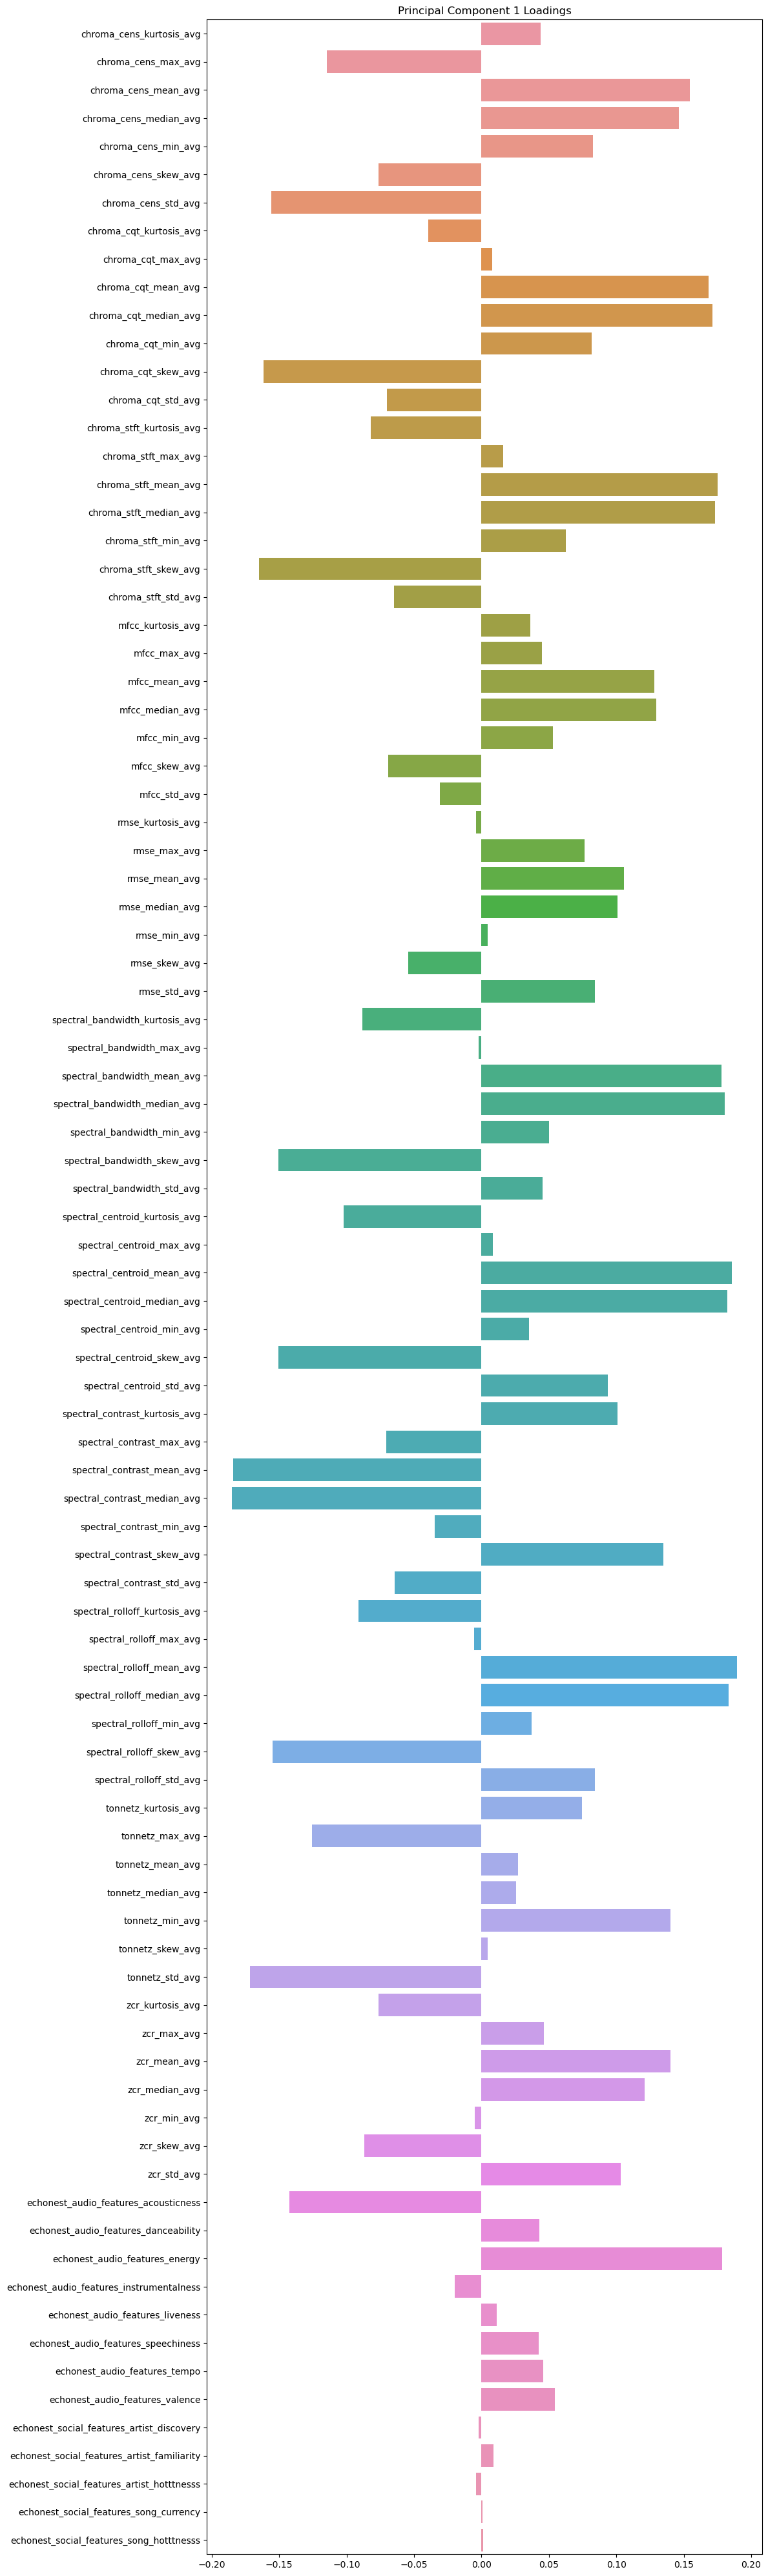

In [28]:
n_components = 1
# Create a DataFrame with loadings
loadings_df = pd.DataFrame(pca.components_, columns=df_reduced.columns)

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # visualize the loadings for each principal component
    plt.figure(figsize=(12, 40))
    for i in range(n_components):
        plt.subplot(1, n_components, i+1)
        sns.barplot(x=loadings_df.iloc[i].values, y=loadings_df.columns)
        plt.title(f'Principal Component {i+1} Loadings')

    plt.tight_layout()

    plt.show()

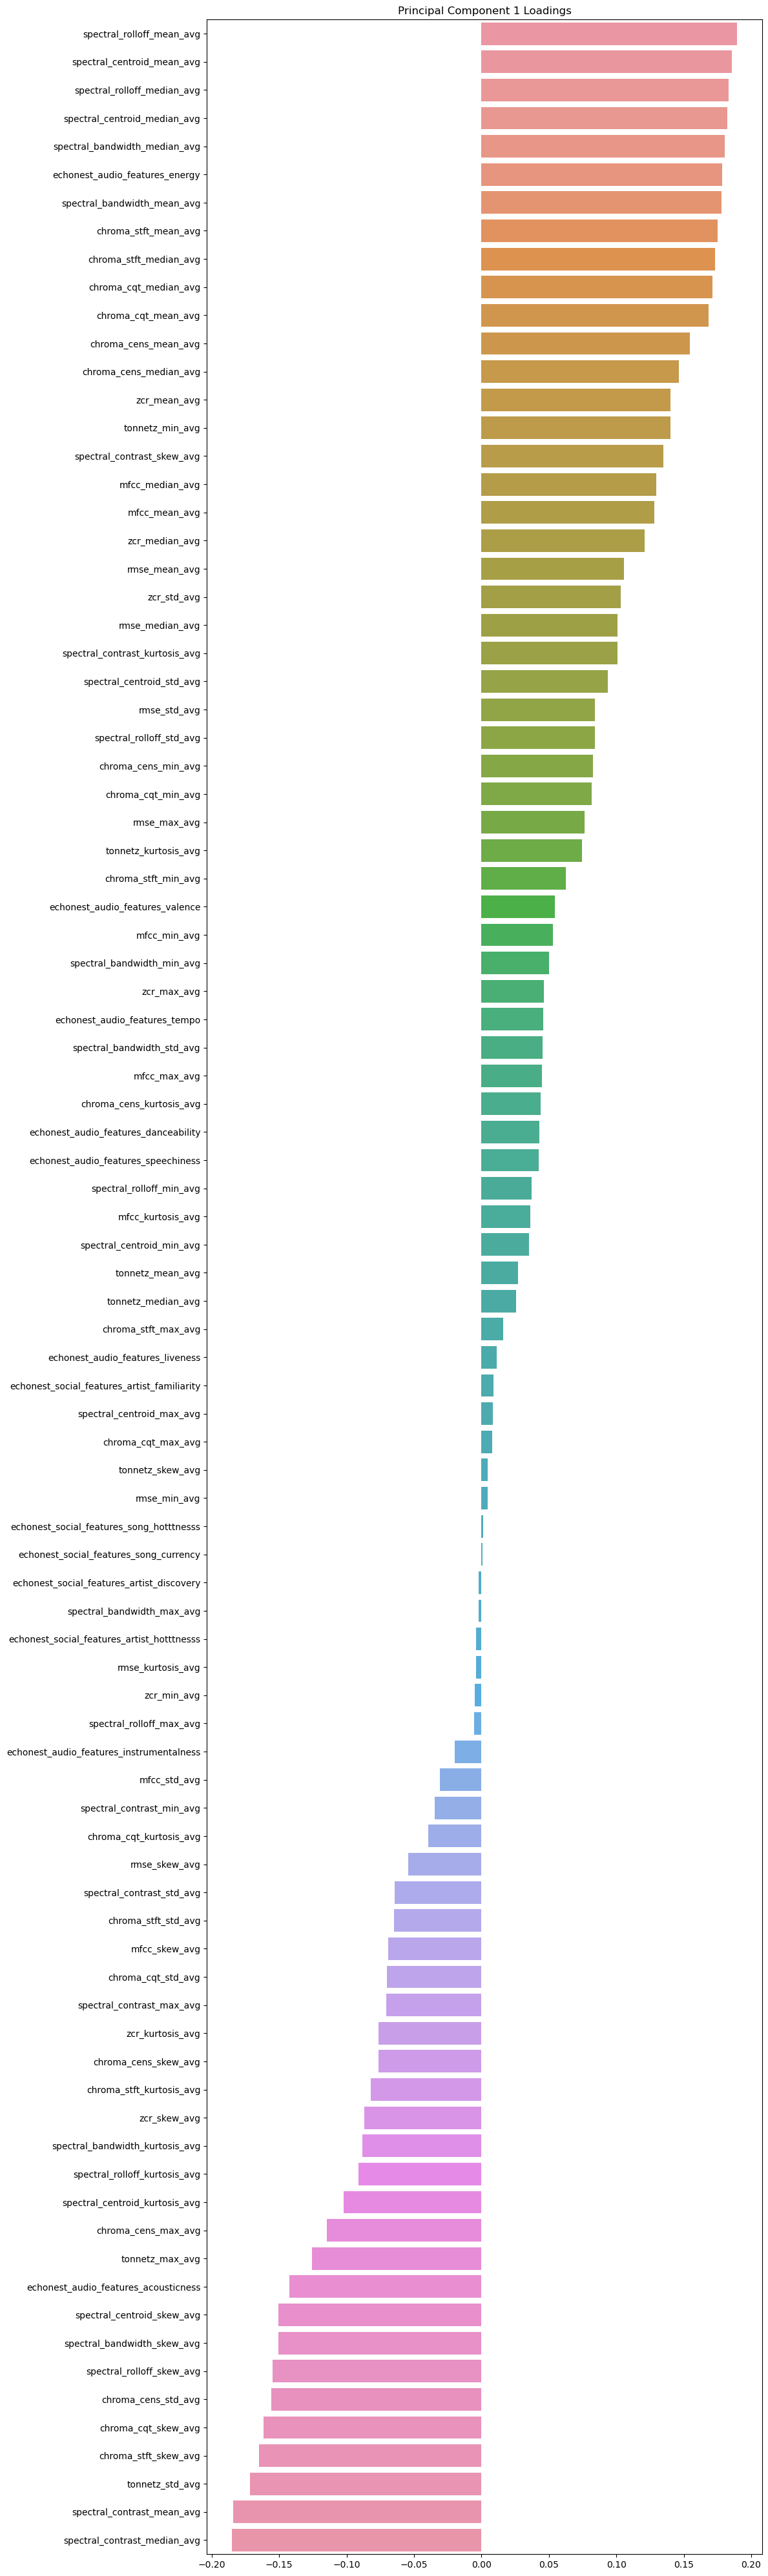

In [29]:
n_components = 1
# Create a DataFrame with loadings
loadings_df = pd.DataFrame(pca.components_, columns=df_reduced.columns)

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # visualize the loadings for each principal component sorted by importance
    plt.figure(figsize=(12, 40))
    for i in range(n_components):
        plt.subplot(1, n_components, i+1)
        
        # Sort loadings by importance
        sorted_loadings = loadings_df.iloc[i].sort_values(ascending=False)
        
        sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index)
        plt.title(f'Principal Component {i+1} Loadings')

    plt.tight_layout()

    plt.show()


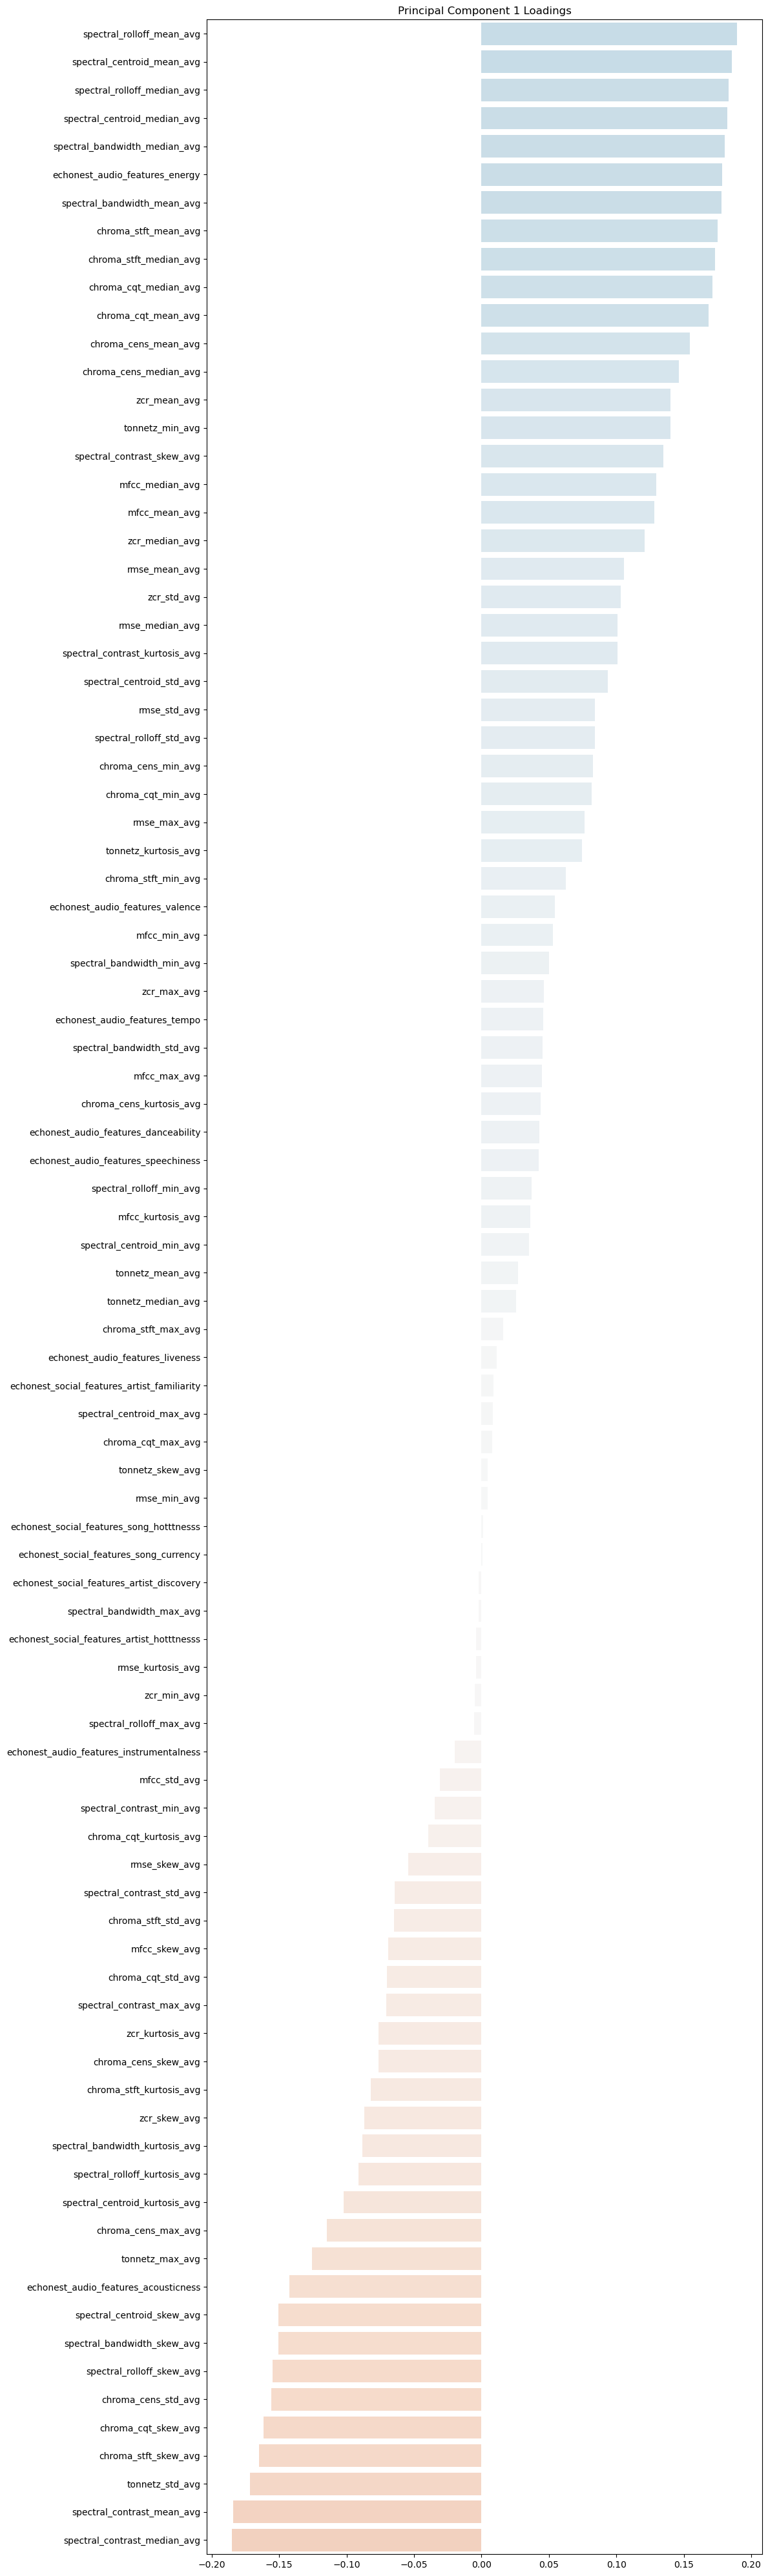

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the number of colors in the gradient
num_colors = 80

# Create a colormap ranging from blue to red
cmap = plt.cm.RdBu

# Normalize the values to fit the colormap range
norm = plt.Normalize(loadings_df.min().min(), loadings_df.max().max())

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # Visualize the loadings for each principal component sorted by importance
    plt.figure(figsize=(12, 40))
    for i in range(n_components):
        plt.subplot(1, n_components, i+1)
        
        # Sort loadings by importance
        sorted_loadings = loadings_df.iloc[i].sort_values(ascending=False)
        
        # Generate color values based on the normalized loadings
        colors = cmap(norm(sorted_loadings))
        
        sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette=colors)
        plt.title(f'Principal Component {i+1} Loadings')

    plt.tight_layout()

    plt.show()


# KMEANS CLUSTERS

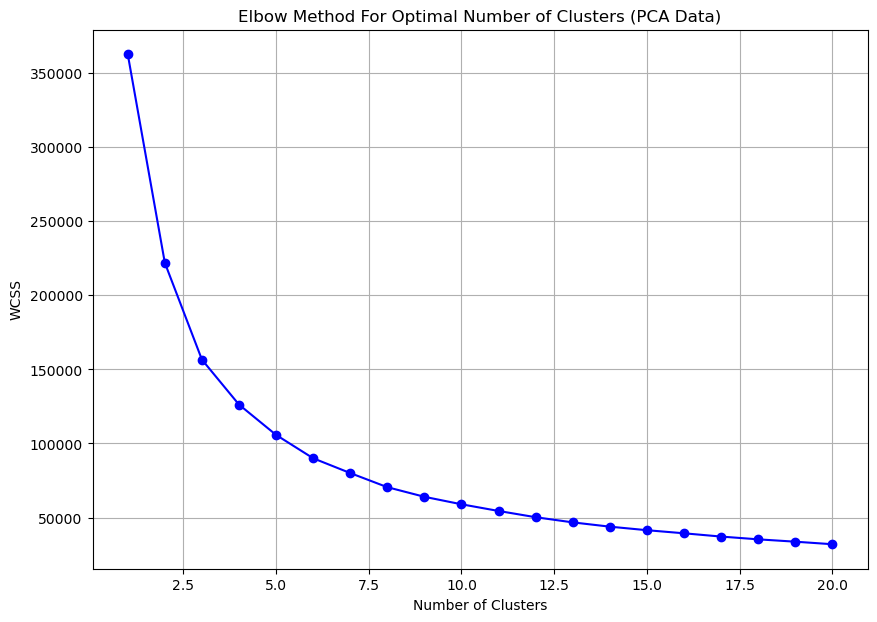

In [31]:
from sklearn.cluster import KMeans

# Extracting the first two principal components for clustering
pca_data_for_clustering = pca.transform(df_reduced_standardized)[:, :2]

# Applying the Elbow Method to determine the optimal number of clusters for KMeans clustering
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_data_for_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 21), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal Number of Clusters (PCA Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.show()


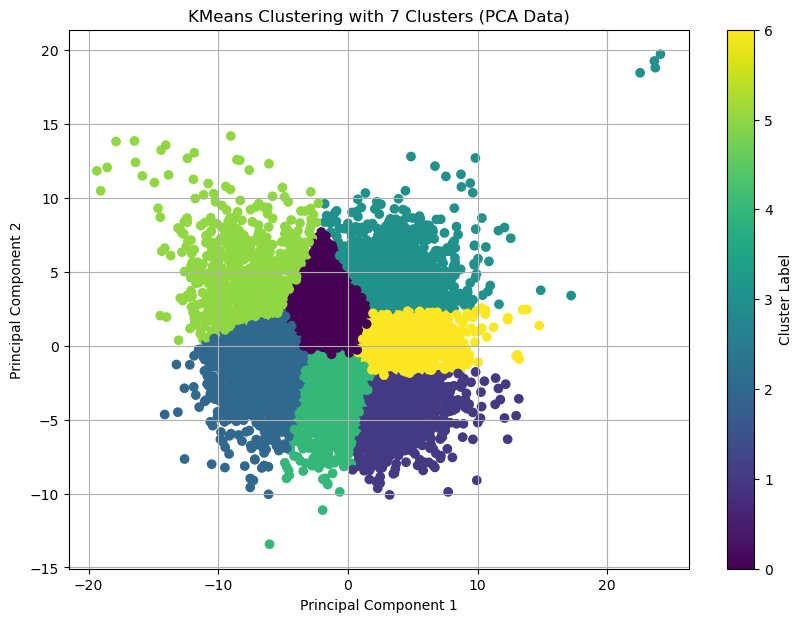

(None, array([6, 6, 6, ..., 3, 4, 2], dtype=int32))

In [32]:
# Applying KMeans clustering with 7 clusters to the PCA-reduced data
kmeans_with_7_clusters = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_with_7_clusters.fit(pca_data_for_clustering)

# Getting the cluster labels for each data point
cluster_labels = kmeans_with_7_clusters.labels_

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_for_clustering[:, 0], pca_data_for_clustering[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering with 7 Clusters (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.show(), cluster_labels


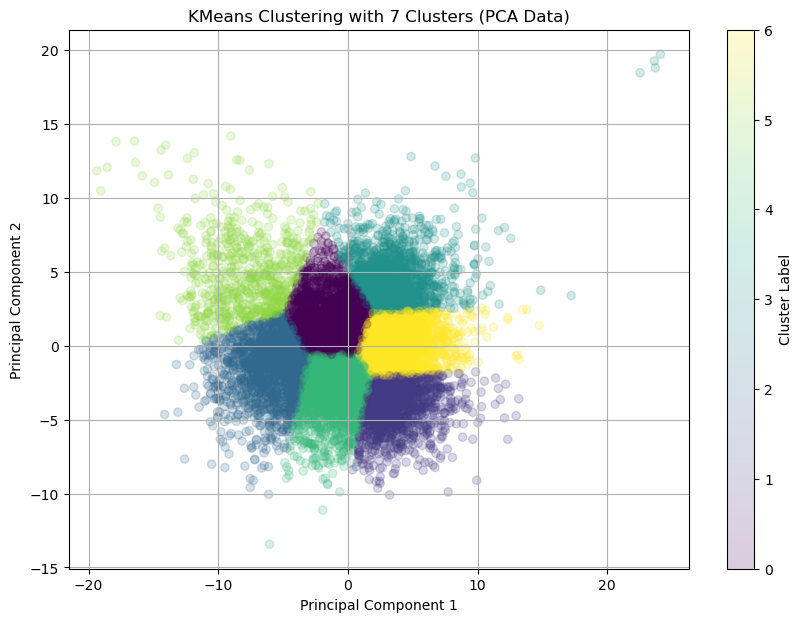

(None, array([6, 6, 6, ..., 3, 4, 2], dtype=int32))

In [33]:
# Plotting the clusters with adjusted transparency
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_for_clustering[:, 0], pca_data_for_clustering[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.2)
plt.title('KMeans Clustering with 7 Clusters (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.show(), cluster_labels


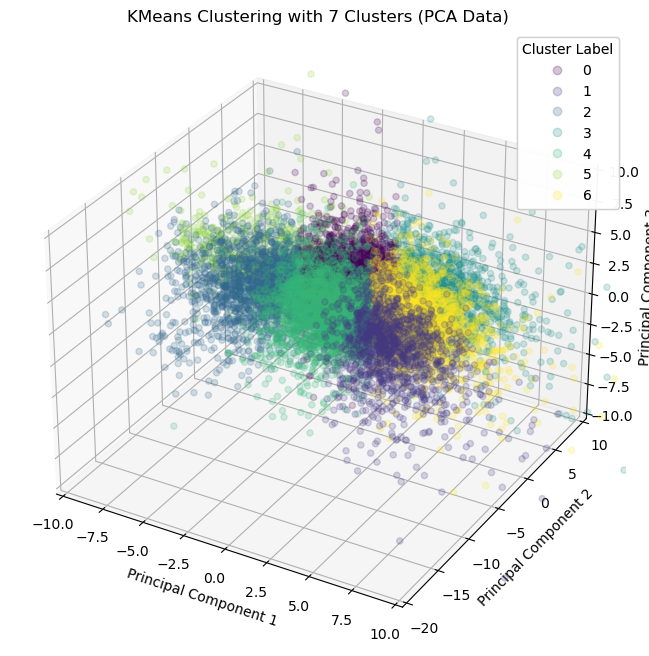

(None, array([6, 6, 6, ..., 3, 4, 2], dtype=int32))

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting the clusters with adjusted transparency in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting the first two principal components for clustering
pca_data_for_clustering_3d = pca.transform(df_reduced_standardized)[:, :3]

# Scatter plot
scatter = ax.scatter(pca_data_for_clustering_3d[:, 0], pca_data_for_clustering_3d[:, 1], pca_data_for_clustering_3d[:, 2],
                     c=cluster_labels, cmap='viridis', marker='o', alpha=0.2)

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster Label")
ax.add_artist(legend)

# Labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set y-axis limits
ax.set_ylim(-20, 10)
ax.set_xlim(-10, 10)
ax.set_zlim(-10, 10)

plt.title('KMeans Clustering with 7 Clusters (PCA Data)')

plt.show(), cluster_labels



# Sillouette Plot

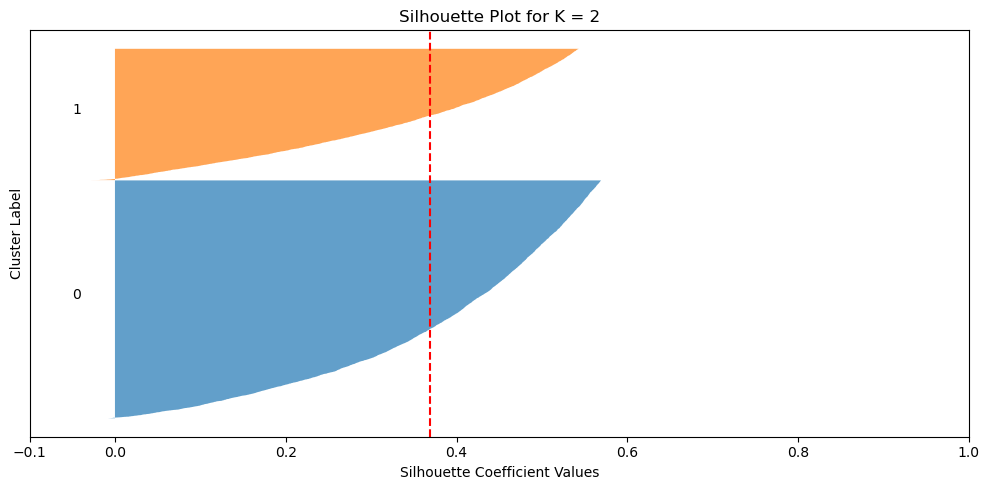

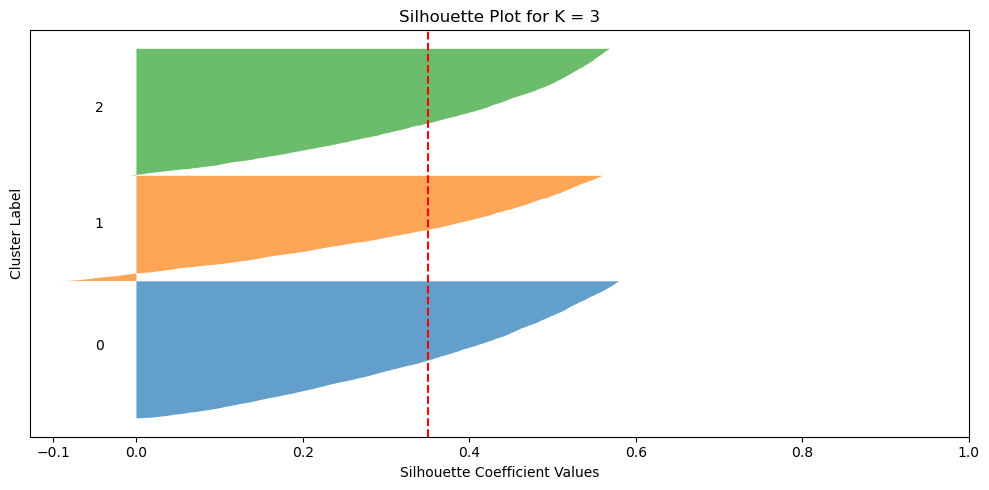

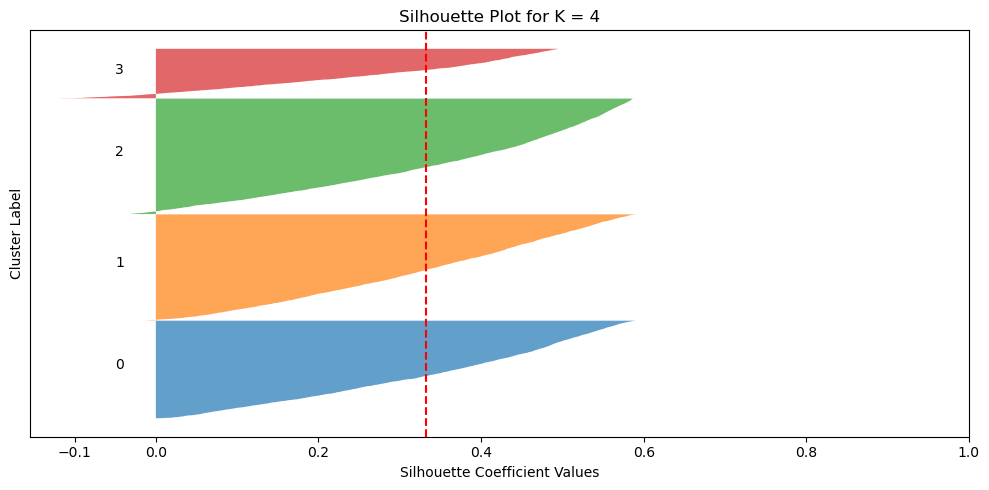

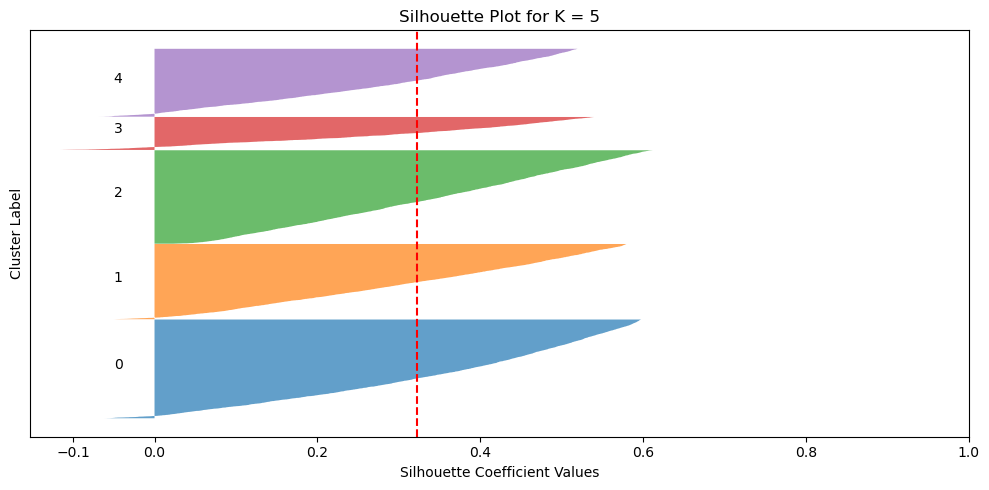

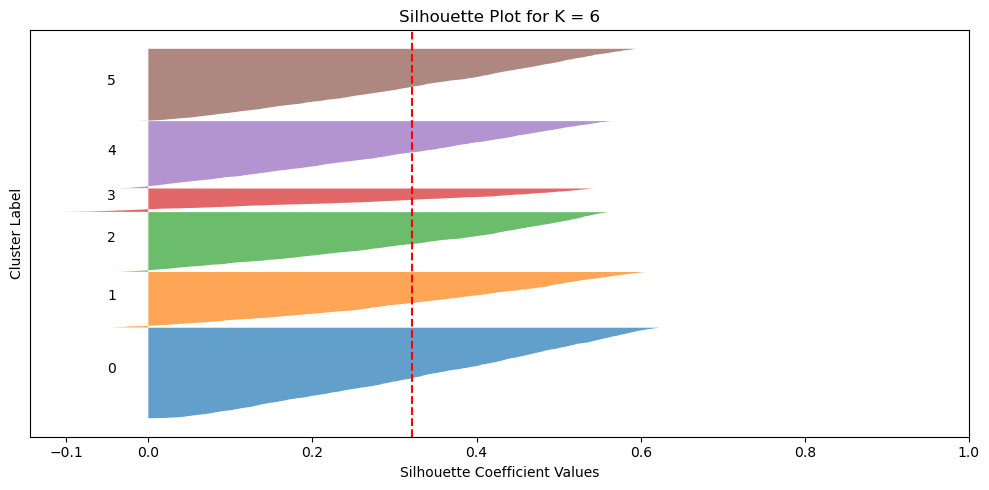

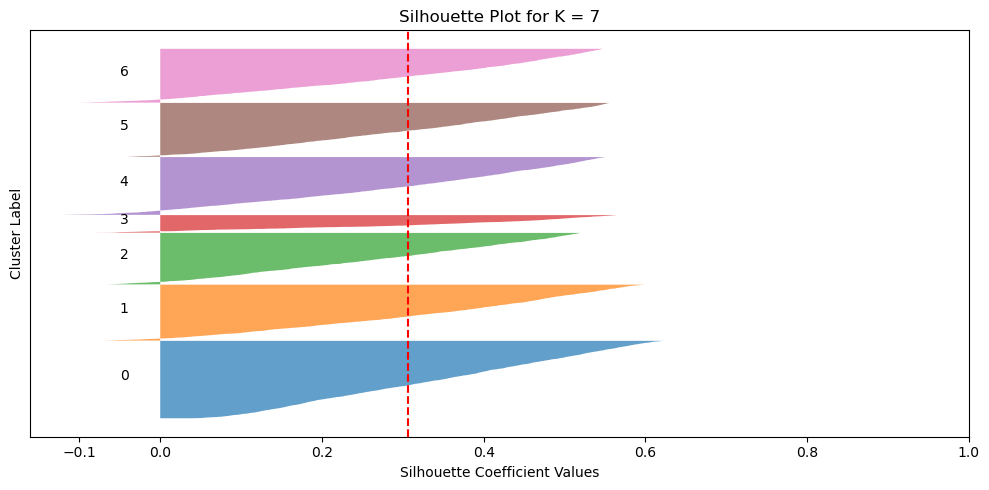

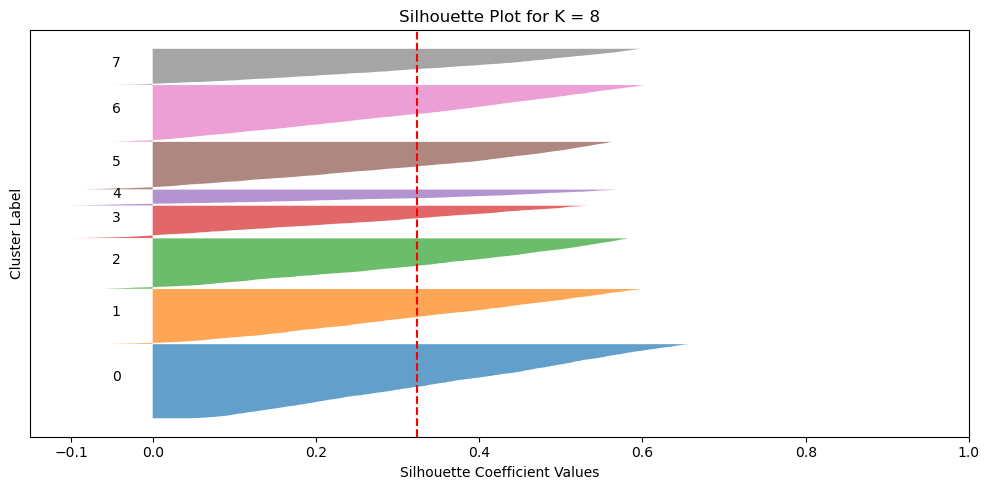

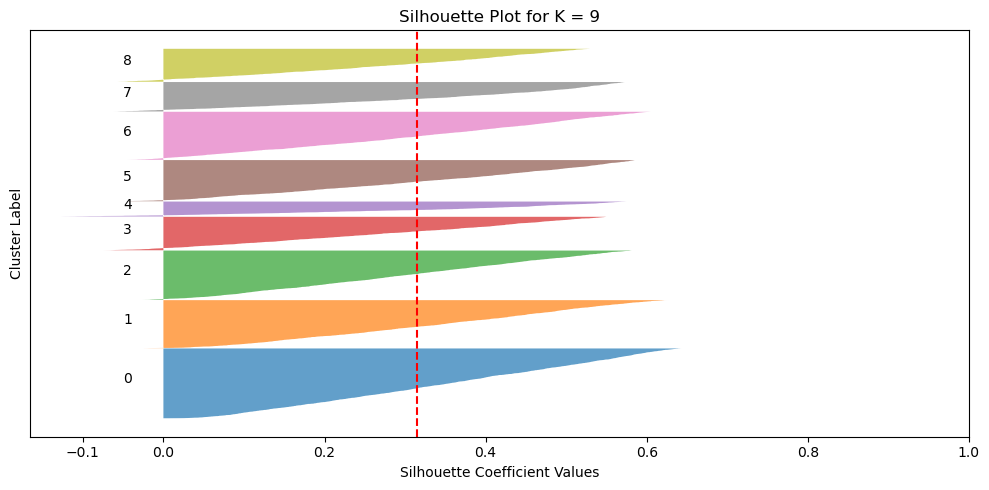

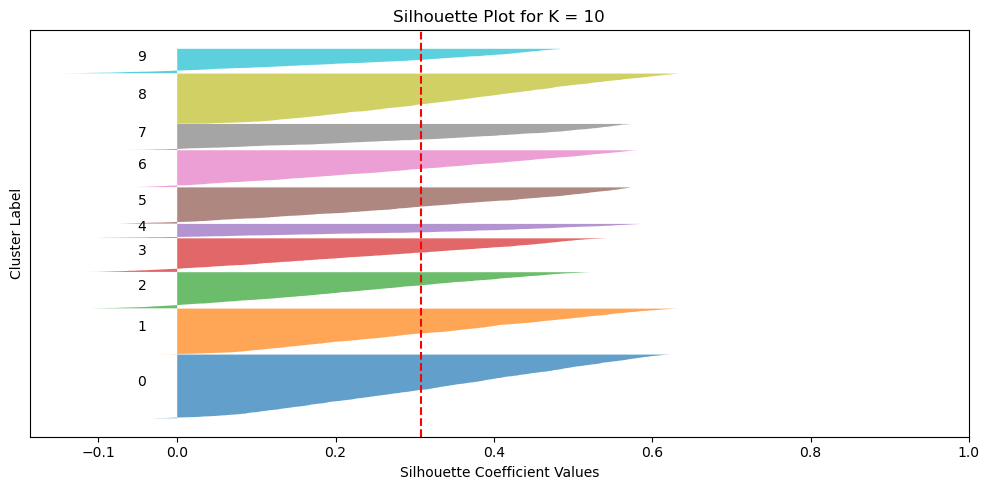

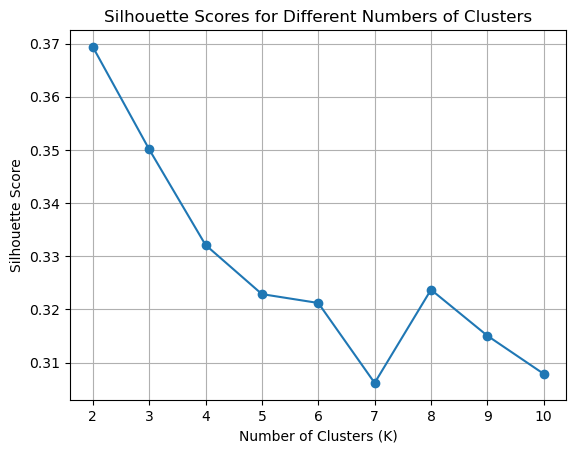

In [35]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for K
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Loop through each value of K
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to your data
    kmeans.fit(pca_data_for_clustering)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(pca_data_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette coefficients for each sample
    sample_silhouette_values = silhouette_samples(pca_data_for_clustering, cluster_labels)
    
    # Create a subplot for the silhouette plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 1, 1)
    
    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the area between the 0th and ith silhouette coefficients
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)
        
        # Label silhouette plots with their cluster numbers
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
    
    plt.title(f"Silhouette Plot for K = {k}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    
    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    plt.yticks([])  # Clear yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.tight_layout()
    
    plt.show()

# Plot silhouette scores for different K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()


# TRY DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust eps and min_samples parameters

# Fit the model to your data
dbscan.fit(pca_data_for_clustering)

# Get cluster labels
cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Estimated number of clusters: 14
Estimated number of noise points: 301


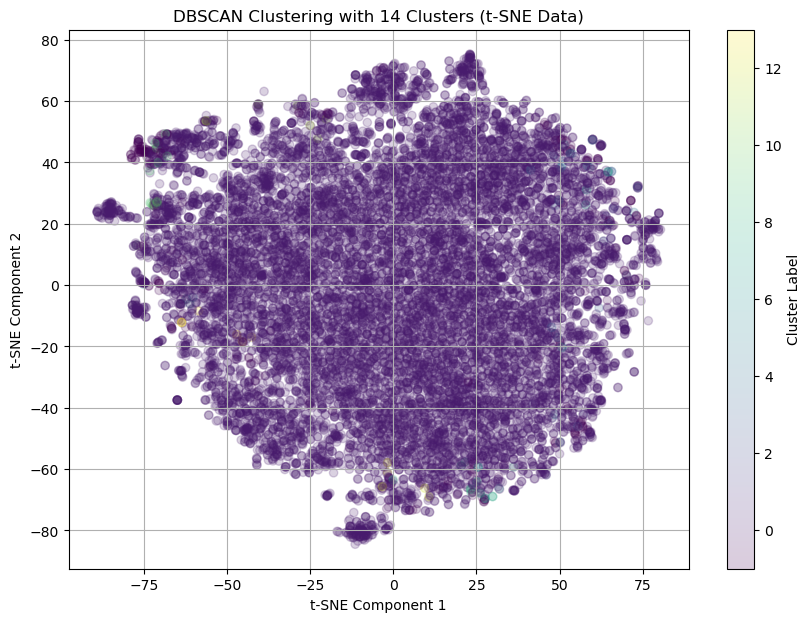

(None, array([0, 0, 0, ..., 0, 0, 0]))

In [37]:
# Plotting the clusters with adjusted transparency
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.2)
plt.title('DBSCAN Clustering with 14 Clusters (t-SNE Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.show(), cluster_labels


# TRY GMM

In [38]:
from sklearn.mixture import GaussianMixture

# Initialize GMM model
gmm = GaussianMixture(n_components=7, random_state=42)  # You may need to adjust n_components

# Fit the model to your data
gmm.fit(pca_data_for_clustering)

# Predict the cluster labels
cluster_labels = gmm.predict(pca_data_for_clustering)

# Get the probabilities of each sample belonging to each cluster
cluster_probs = gmm.predict_proba(pca_data_for_clustering)

# Number of clusters
n_clusters_ = len(np.unique(cluster_labels))

print(f'Number of clusters: {n_clusters_}')


Number of clusters: 7


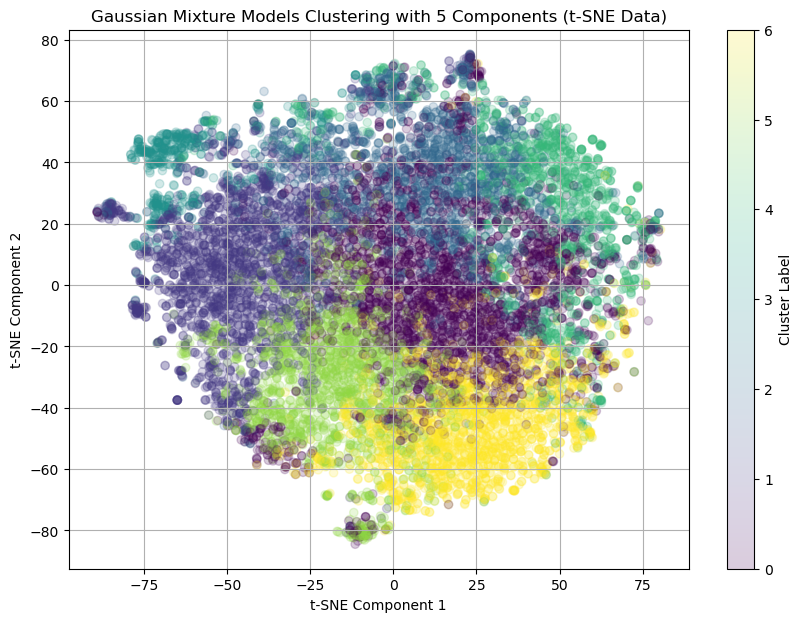

(None, array([0, 6, 0, ..., 4, 0, 1]))

In [39]:
# Plotting the clusters with adjusted transparency
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.2)
plt.title('Gaussian Mixture Models Clustering with 5 Components (t-SNE Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.show(), cluster_labels


# Try KMEANS on T-SNE

In [40]:
# Applying KMeans clustering with 7 clusters to the PCA-reduced data
kmeans_with_7_clusters_tsne = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_with_7_clusters_tsne.fit(tsne_data)

# Getting the cluster labels for each data point
cluster_labels_tsne = kmeans_with_7_clusters_tsne.labels_

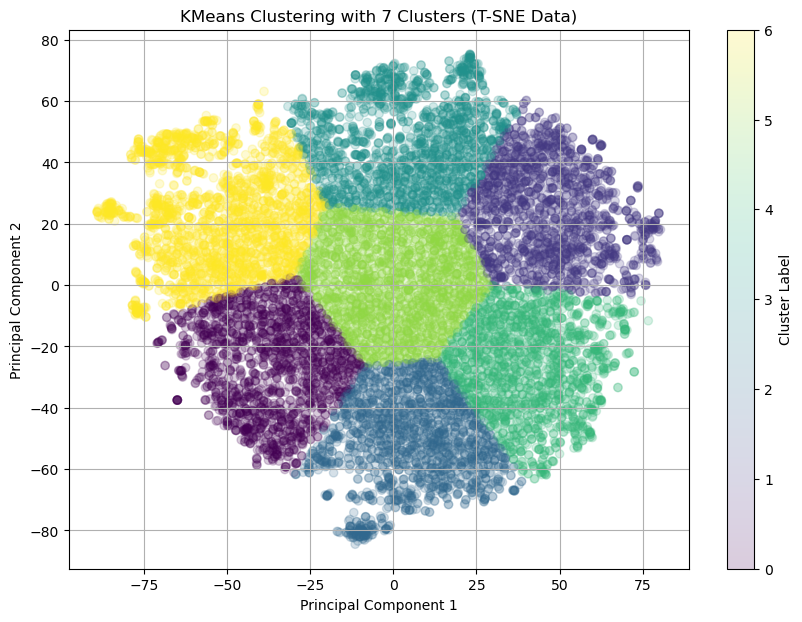

(None, array([5, 2, 4, ..., 4, 5, 6], dtype=int32))

In [41]:
# Plotting the clusters with adjusted transparency
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels_tsne, cmap='viridis', marker='o', alpha=0.2)
plt.title('KMeans Clustering with 7 Clusters (T-SNE Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.show(), cluster_labels_tsne


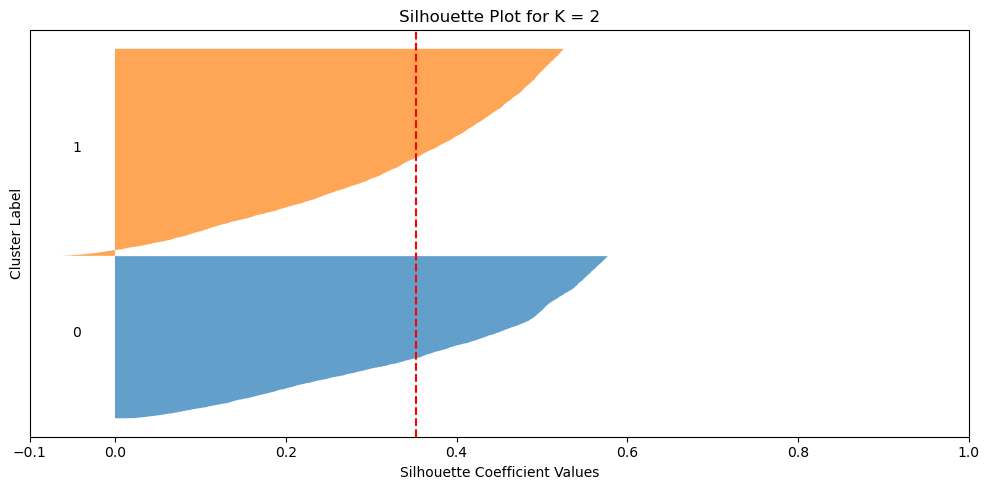

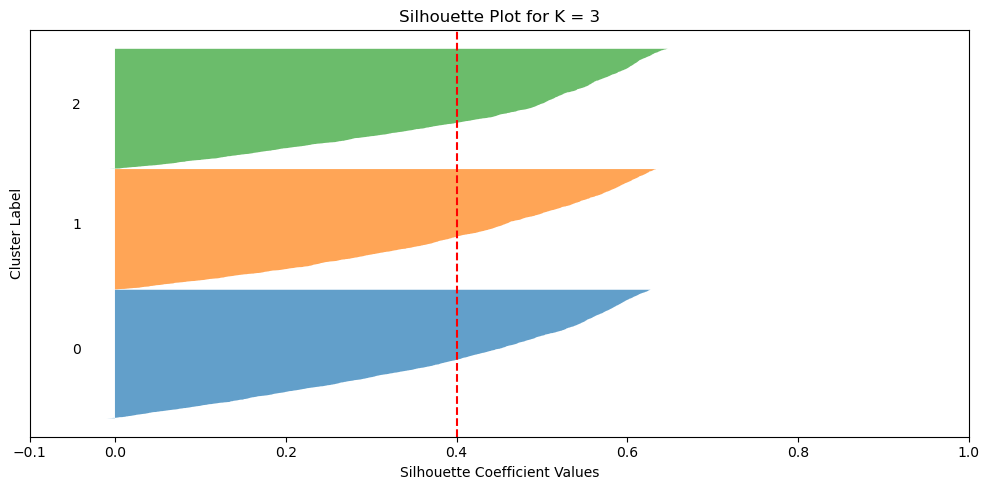

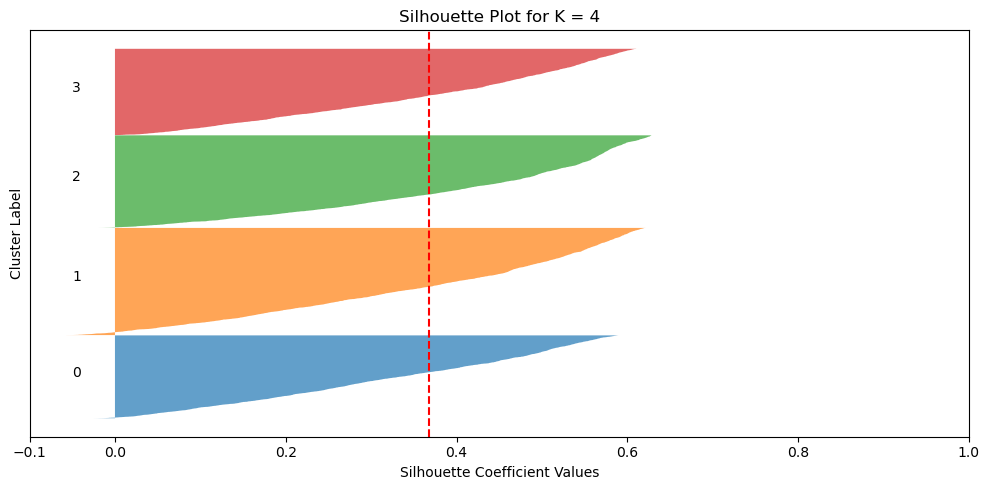

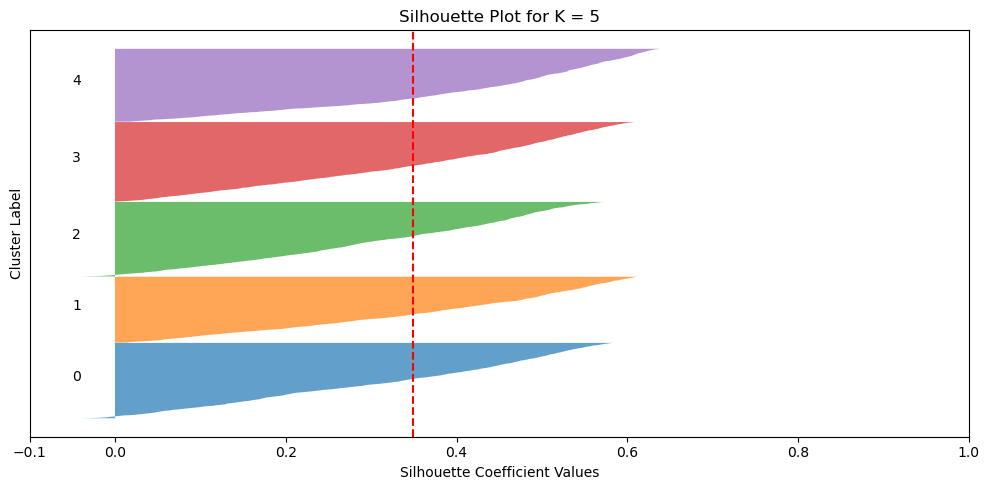

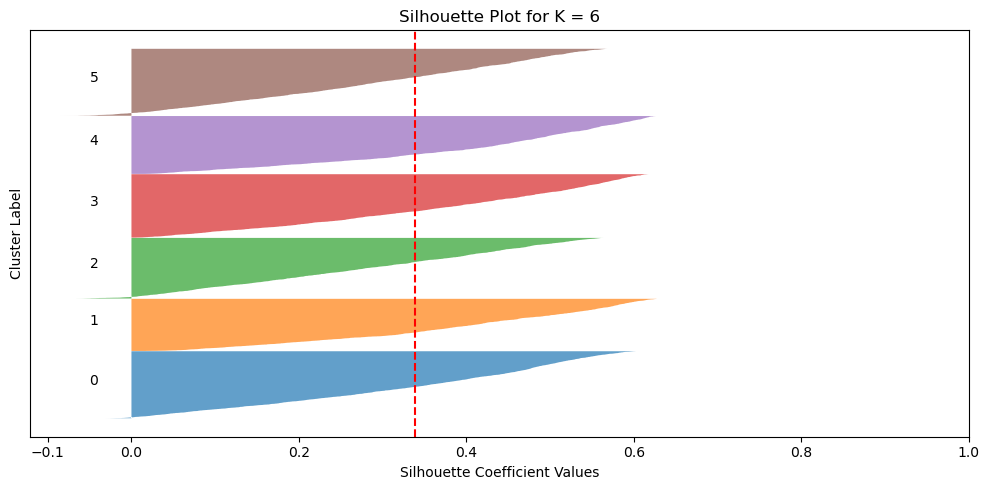

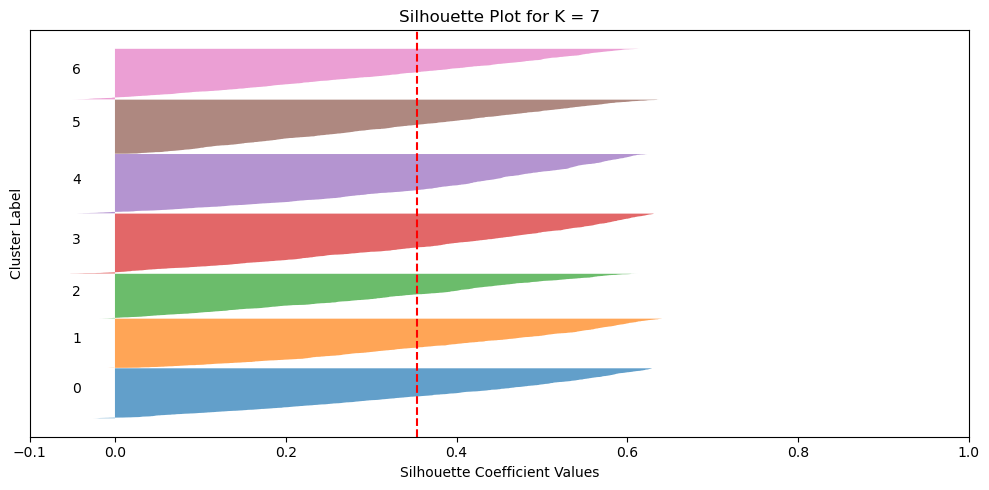

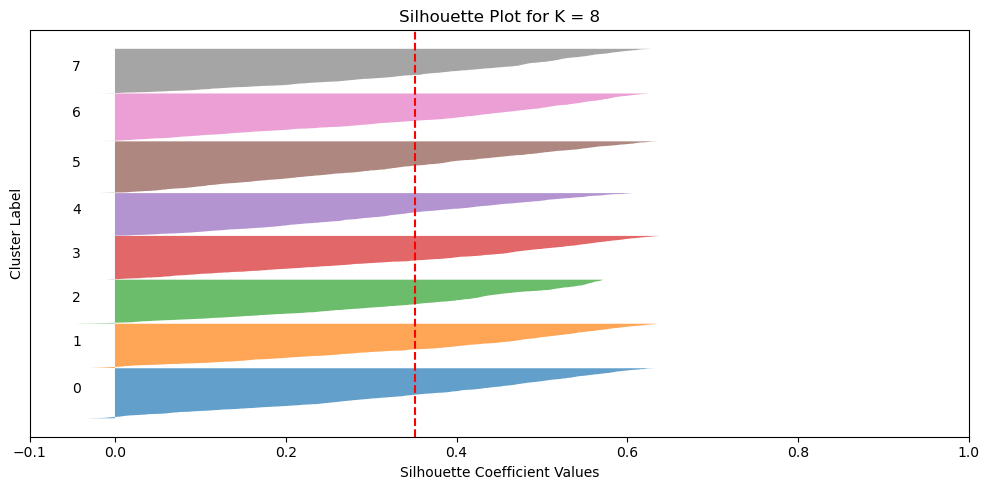

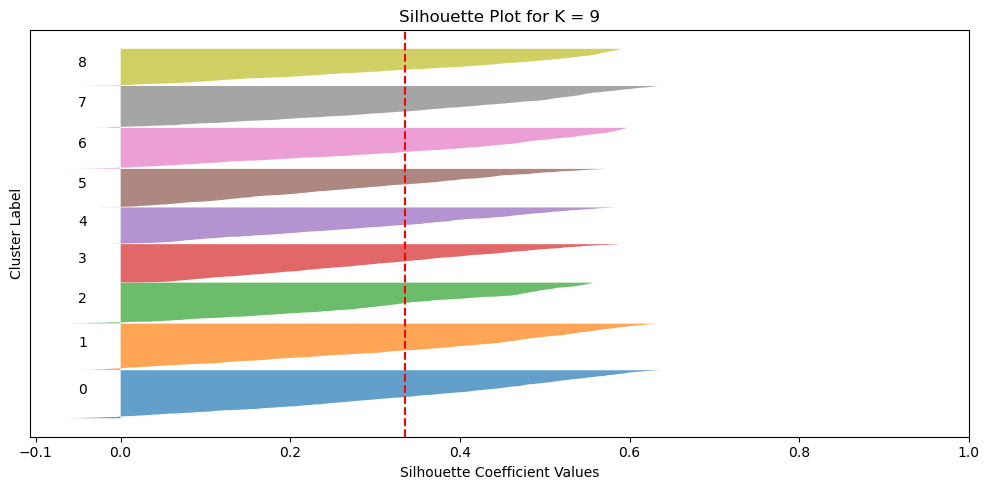

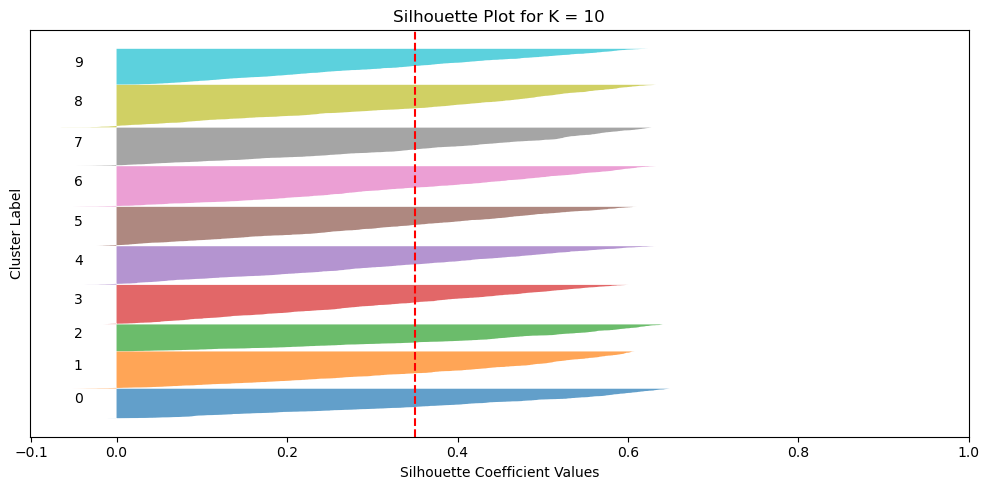

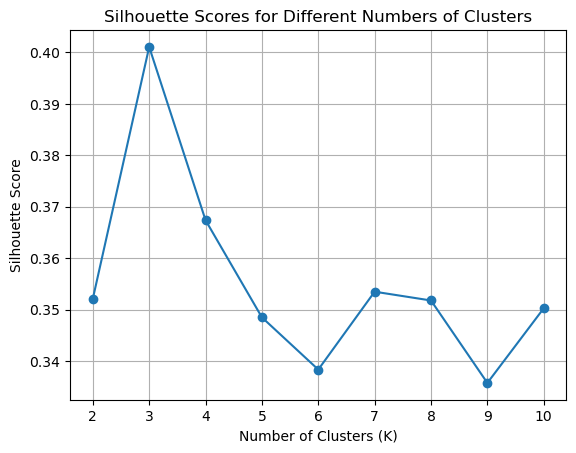

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for K
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Loop through each value of K
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    
    # Fit the model to your data
    kmeans.fit(tsne_data)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(tsne_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette coefficients for each sample
    sample_silhouette_values = silhouette_samples(tsne_data, cluster_labels)
    
    # Create a subplot for the silhouette plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 1, 1)
    
    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the area between the 0th and ith silhouette coefficients
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)
        
        # Label silhouette plots with their cluster numbers
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
    
    plt.title(f"Silhouette Plot for K = {k}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    
    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    plt.yticks([])  # Clear yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.tight_layout()
    
    plt.show()

# Plot silhouette scores for different K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()


In [57]:
# Applying KMeans clustering with 5 clusters to the tsne-reduced data
kmeans_with_5_clusters_tsne = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=123)
kmeans_with_5_clusters_tsne.fit(tsne_data)

# Getting the cluster labels for each data point
cluster_labels_tsne = kmeans_with_5_clusters_tsne.labels_

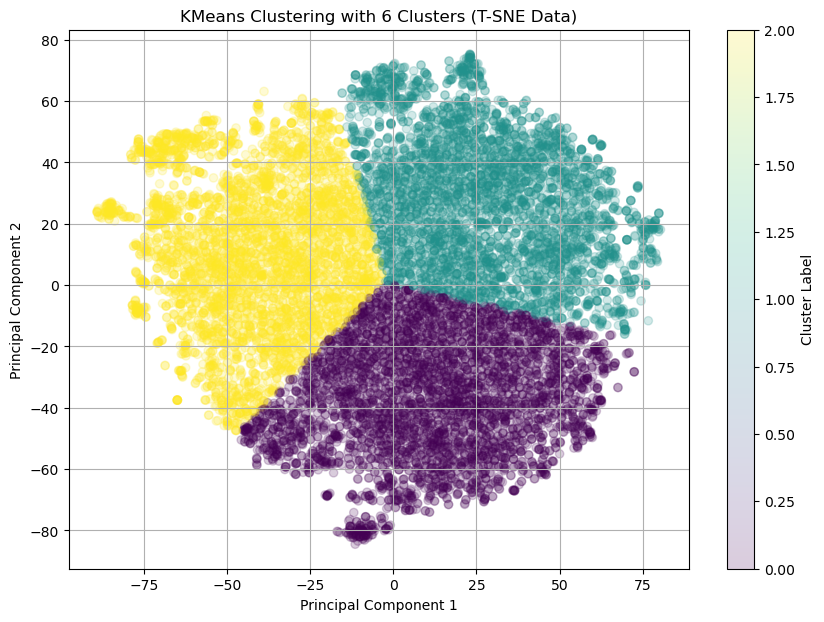

(None, array([0, 0, 0, ..., 0, 0, 2], dtype=int32))

In [58]:
# Plotting the clusters with adjusted transparency
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels_tsne, cmap='viridis', marker='o', alpha=0.2)
plt.title('KMeans Clustering with 6 Clusters (T-SNE Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.show(), cluster_labels_tsne


# TRY U-MAP KMEANS

In [45]:
# NOT WORKING

# Analyze cluster Results

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def perform_kmeans_clustering(X_kpca, num_components):
    # Apply KMeans on the KPCA-reduced data
    km = KMeans(n_clusters=num_components, n_init=10, random_state=42)
    km.fit(X_kpca)
    labels = km.labels_

    # Extract the cluster centers from the KMeans model
    cluster_centers = km.cluster_centers_
    labels_unique = np.unique(labels)

    # Create DataFrame for cluster centers with component names
    component_names = [f"KPC{i+1}" for i in range(cluster_centers.shape[1])]
    km_clusters = pd.DataFrame(cluster_centers, columns=component_names)

    # Assign a unique identifier to each cluster in the DataFrame
    km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
    km_clusters['method'] = 'KMeans'

    # Initialize a new DataFrame for clusters
    clusters = km_clusters.copy()

    # Ensure the columns list includes the dynamically adjusted component names
    cols = ['cluster'] + component_names + ['method']
    clusters = clusters[cols]

    # Create DataFrame with X_kpca and assigned clusters
    data_with_clusters = pd.DataFrame(X_kpca, columns=[f"KPC{i+1}" for i in range(X_kpca.shape[1])])
    data_with_clusters['cluster'] = labels

    return clusters, data_with_clusters

In [47]:
df_reduced.shape

(13129, 90)

In [48]:
num_components = 7
clusters_df, data_with_clusters_df = perform_kmeans_clustering(pca_data_for_clustering, num_components)

In [49]:
clusters_df.shape

(7, 4)

In [50]:
data_with_clusters_df.shape

(13129, 3)

In [51]:
# Merge echo_df and km_clusters on their indices
merged_df = pd.merge(echo_df, data_with_clusters_df, left_index=True, right_index=True)

# Print the merged DataFrame
merged_df.head()

album_comments   album_date_created album_date_released album_engineer  \
0               0  2008-11-26 01:44:45          2009-01-05            NaN   
1               0  2008-11-26 01:44:45          2009-01-05            NaN   
2               0  2008-11-26 01:44:45          2009-01-05            NaN   
3               0  2008-11-26 01:45:08          2008-02-06            NaN   
4               0  2008-11-26 01:44:45          2009-01-05            NaN   

   album_favorites  album_id album_information  album_listens album_producer  \
0                4         1           <p></p>           6073            NaN   
1                4         1           <p></p>           6073            NaN   
2                4         1           <p></p>           6073            NaN   
3                4         6               NaN          47632            NaN   
4                4         1           <p></p>           6073            NaN   

  album_tags  ... echonest_temporal_features_217  \
0         []  ...                       0.192880   
1         []  ...                       0.220905   
2         []  ...                       0.237820   
3         []  ...                       0.267070   
4         []  ...                       0.199550   

   echonest_temporal_features_218 echonest_temporal_features_219  \
0                        0.027455                        0.06408   
1                        0.081368                        0.06413   
2                        0.060122                        0.06014   
3                        0.125704                        0.08082   
4                        0.149332                        0.06440   

  echonest_temporal_features_220 echonest_temporal_features_221  \
0                        3.67696                        3.61288   
1                        6.08277                        6.01864   
2                        5.92649                        5.86635   
3                        8.41401                        8.33319   
4                       11.26707                       11.20267   

  echonest_temporal_features_222 echonest_temporal_features_223      KPC1  \
0                      13.316690                     262.929749  3.372174   
1                      16.673548                     325.581085  3.880551   
2                      16.013849                     356.755737  1.830162   
3                      21.317064                     483.403809  2.698326   
4                      26.454180                     751.147705  2.112128   

       KPC2  cluster  
0 -0.216406        6  
1 -1.420209        6  
2 -0.689199        6  
3  2.320120        3  
4 -1.755370        6  

[5 rows x 822 columns]

In [52]:
# Filter out columns with numbers in the column name
columns_to_drop = [col for col in merged_df.columns if any(char.isdigit() for char in col)]

# Drop the filtered columns
merged_df = merged_df.drop(columns=columns_to_drop)

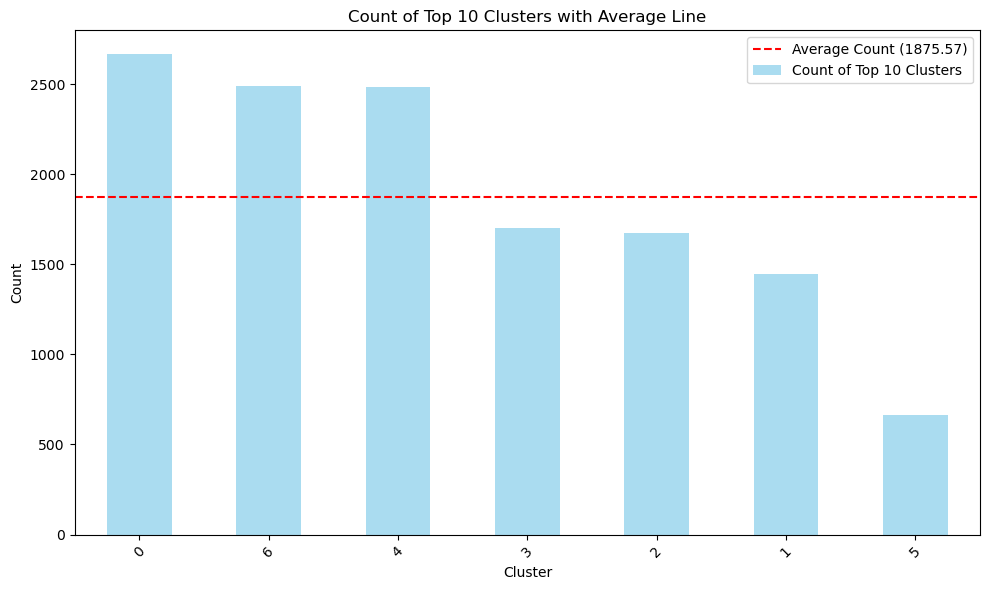

In [53]:
import matplotlib.pyplot as plt

# Group by the "cluster" column and count the rows
cluster_counts = merged_df.groupby('cluster').size()

# Get the top 10 clusters
top_10_clusters = cluster_counts.nlargest(10)

# Plot the counts of the top 10 clusters
plt.figure(figsize=(10, 6))
top_10_clusters.plot(kind='bar', color='skyblue', alpha=0.7, label='Count of Top 10 Clusters')

# Calculate the average count of all clusters
average_count = cluster_counts.mean()

# Plot the average line
plt.axhline(y=average_count, color='red', linestyle='--', label=f'Average Count ({average_count:.2f})')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Top 10 Clusters with Average Line')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


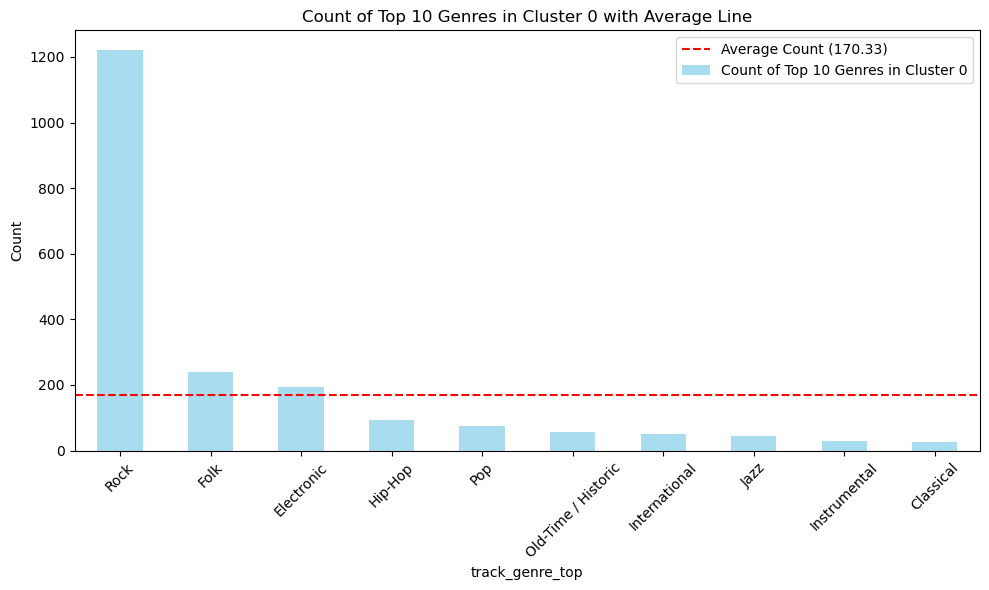

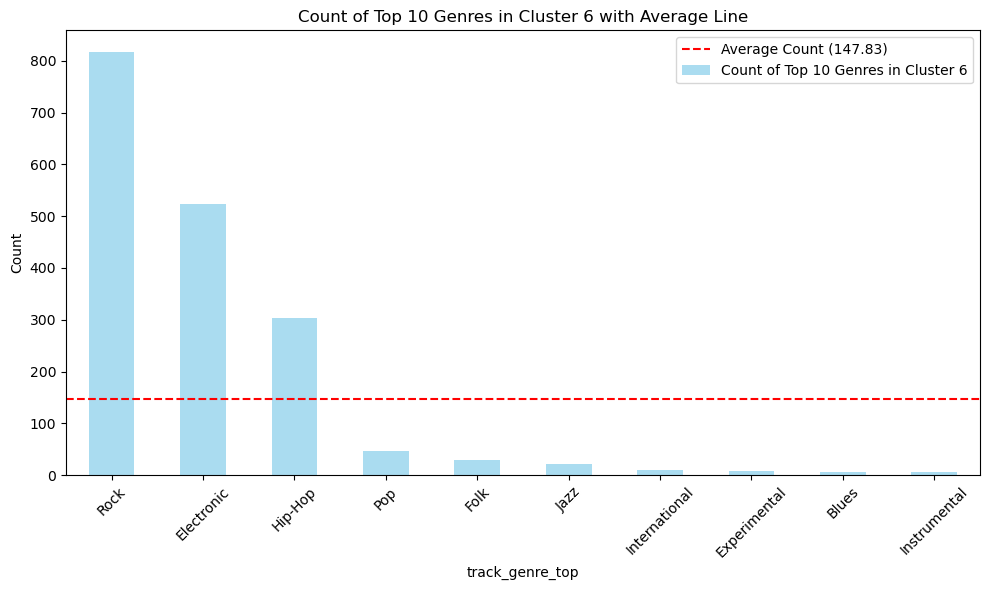

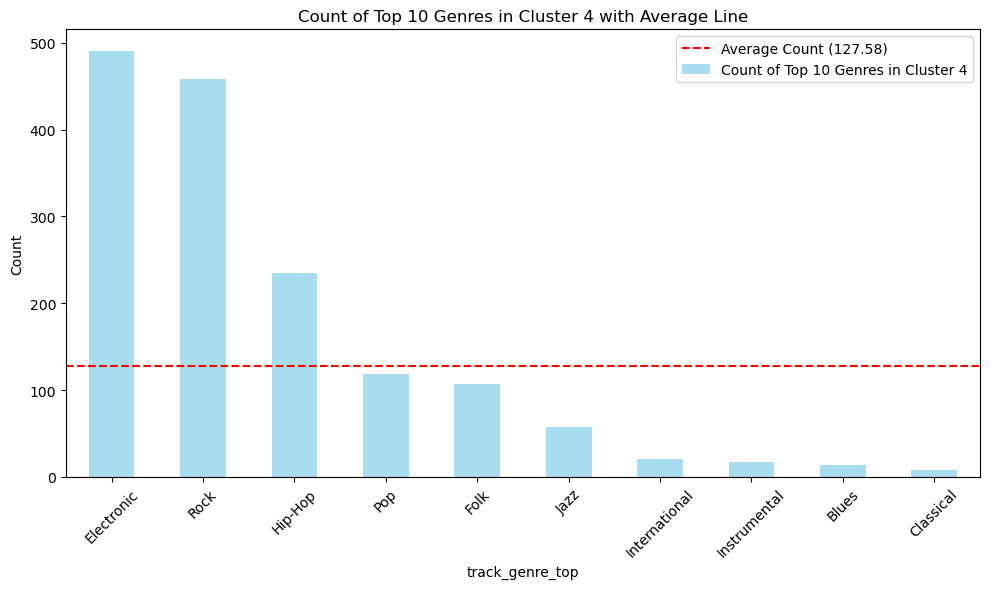

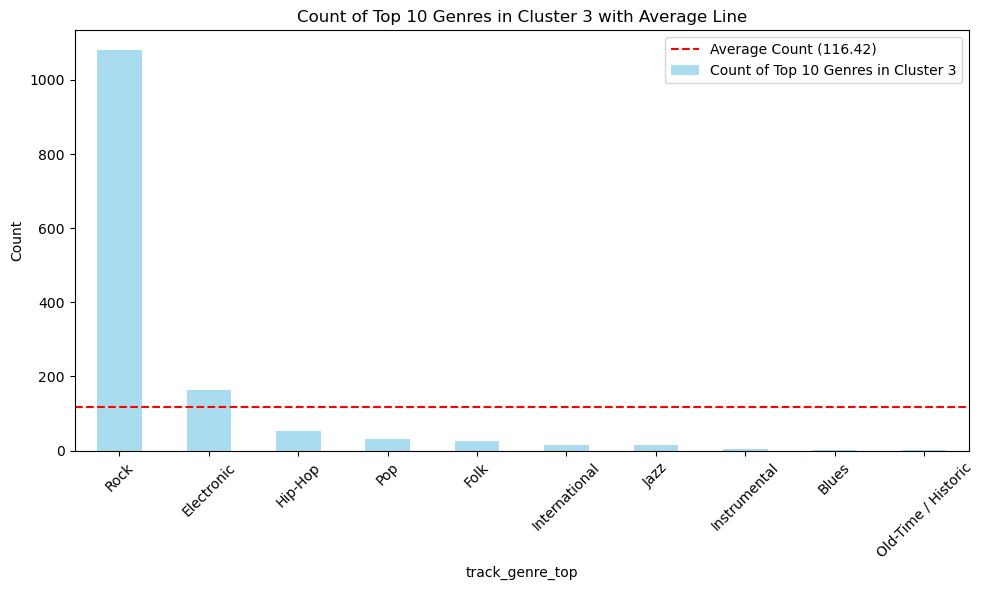

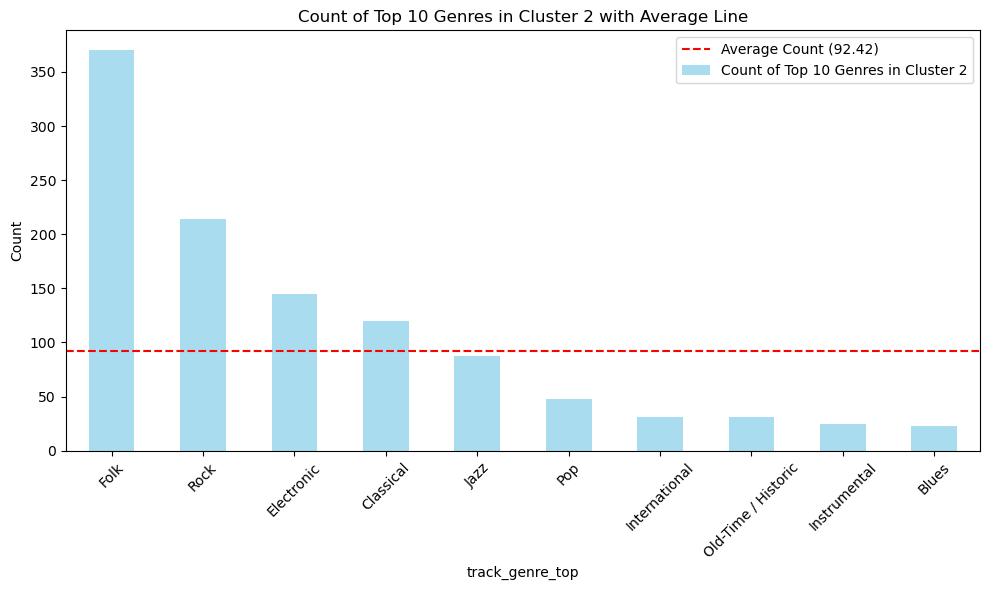

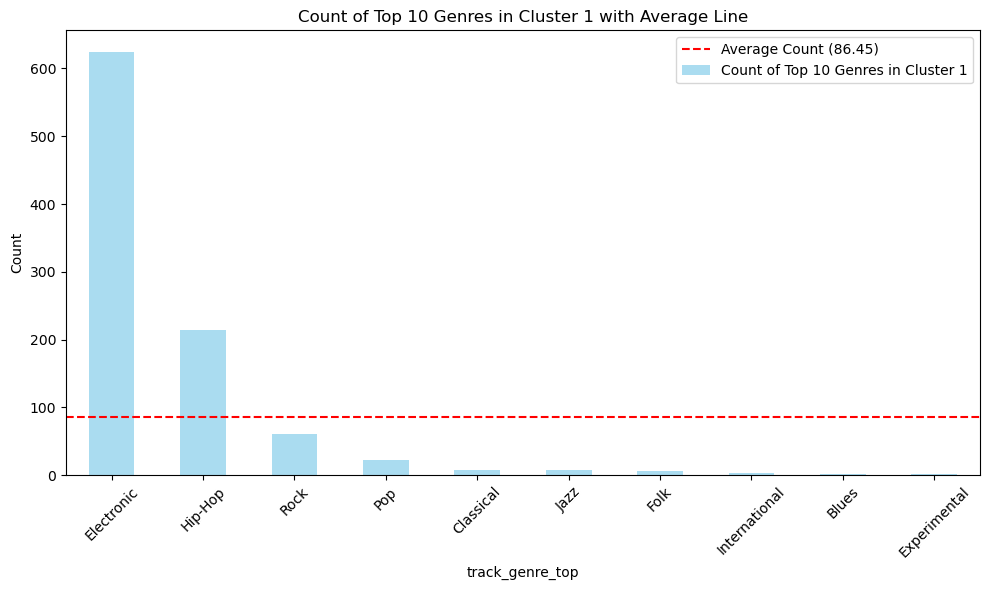

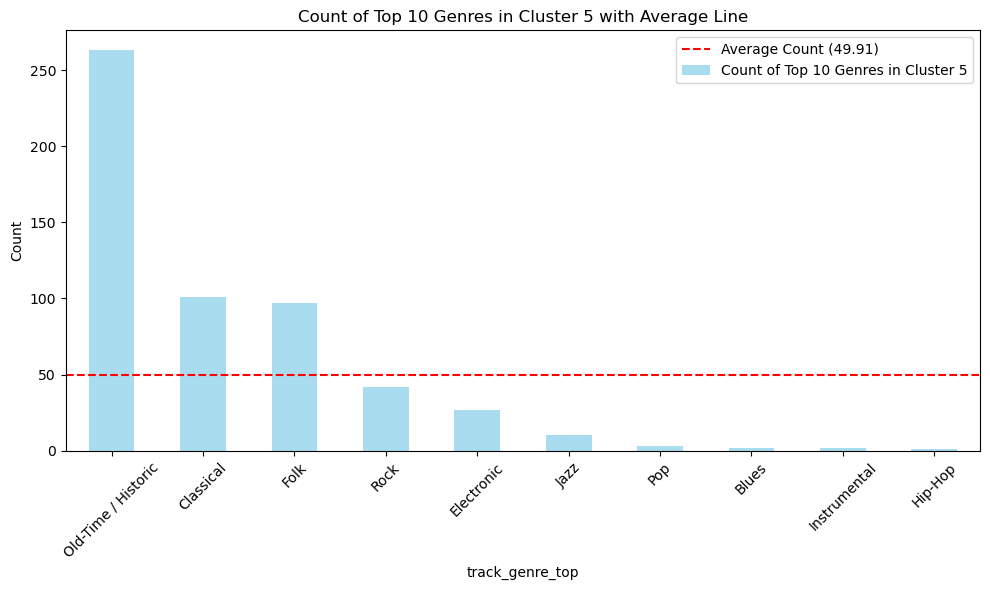

In [54]:
import matplotlib.pyplot as plt

# Group by the "cluster" column and count the rows
cluster_counts = merged_df.groupby('cluster').size()

# Get the top 10 clusters
top_10_clusters = cluster_counts.nlargest(10)

# Loop through the top 10 clusters
for cluster_num in top_10_clusters.index:
    # Filter rows belonging to the current cluster number
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]

    # Group by the "track_genre_top" column and count the rows
    genre_counts = cluster_data.groupby('track_genre_top').size()

    # Get the top 10 genres
    top_10_genres = genre_counts.nlargest(10)

    # Plot the counts of the top 10 genres for the current cluster
    plt.figure(figsize=(10, 6))
    top_10_genres.plot(kind='bar', color='skyblue', alpha=0.7, label=f'Count of Top 10 Genres in Cluster {cluster_num}')

    # Calculate the average count of all genre groups for the current cluster
    average_count = genre_counts.mean()

    # Plot the average line for the current cluster
    plt.axhline(y=average_count, color='red', linestyle='--', label=f'Average Count ({average_count:.2f})')

    # Add labels and title
    plt.xlabel('track_genre_top')
    plt.ylabel('Count')
    plt.title(f'Count of Top 10 Genres in Cluster {cluster_num} with Average Line')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot for the current cluster
    plt.show()


# Alternative Dim Reduction methods

## ISO MAP

## LLE (Locally Linear Embedding)

## Autoencoders